## Milestone 3 : Inital analysis with simple features

## Dataset Cleaning & Preprocessing

In [1]:
import pandas as pd
from ast import literal_eval
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

Data loading

In [2]:
df_genres = pd.read_csv('midi_dataframe_genres_flattened.csv', parse_dates=[11], index_col='file_name')

num_games = len(df_genres.groupby(['tgdb_platform', 'tgdb_gametitle']))
print('There is %d midi files, from %d games, with %d midis matched with tgdb'
      %(len(df_genres.groupby('file_name')),
        num_games,
        (df_genres.tgdb_gametitle.notnull().sum())))

df_features = pd.read_csv('features.csv').set_index('file_name')
print("There is %d midi files with computed features"%(len(df_features)))

print("After removing not valid midi files, we have %d files"%(len(df_genres.join(df_features, how='inner').groupby('file_name'))))

There is 22179 midi files, from 3243 games, with 34510 midis matched with tgdb
There is 31483 midi files with computed features
After removing not valid midi files, we have 22005 files


In [3]:
df_pred = df_genres[['genre']].join(df_features, how='inner')
# For more easy displaying of the genre title on the graph
df_pred['genre'] = df_pred['genre'].apply(lambda x : x.replace("Simulator", "Sim.").replace("Simulation", "Sim.").\
             replace("Construction and Management", "C&M"))
df_pred.head()

,genre,Prevalence_of_Most_Common_Pitch,Prevalence_of_Most_Common_Pitch_Class,Relative_Prevalence_of_Top_Pitches,Relative_Prevalence_of_Top_Pitch_Classes,Interval_Between_Most_Prevalent_Pitches,Interval_Between_Most_Prevalent_Pitch_Classes,Number_of_Common_Pitches,Pitch_Variety,Pitch_Class_Variety,...,Parallel_Motion,Similar_Motion,Contrary_Motion,Oblique_Motion,Parallel_Fifths,Parallel_Octaves,Dynamic_Range,Variation_of_Dynamics,Variation_of_Dynamics_In_Each_Voice,Average_Note_to_Note_Change_in_Dynamics
file_name,,,,,,,,,,,,,,,,,,,,,
0004cc74bde3bc82f44afb5f566187c3dbcea9b2.mid,Platform,0.1593,0.2242,0.7222,0.7500,5.0,5.0,2.0,28.0,12.0,...,0.0000,0.0,0.0000,0.00000,0.0,0.0,63.0,17.65,6.3240,13.7800
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Action,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Adventure,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Sports,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Strategy,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128


## Feature Exploration & Analysis

To better understand if the research question might have foundation, it is important to explore the features produced by jSymbolic and understand if some of them might be of interest to draw correlation between game music features and game design. The approach used for this exploratory analysis was to start with the most general and top-level features and then visualise them.

In [4]:
#For all analysis according to genre, we obviously need to group all the features per midi to a genre :
df_pred = df_pred[~(df_pred['genre'] == 'Vehicle Sim.')]
#We drop one category, the "Vehicle Simulation" genre, since only one Midi track has this genre.
groupby_genre = df_pred.groupby(by='genre')
groupby_stats = groupby_genre.describe()
games_genre = list(groupby_stats.index)

The distribution of midi per genre is shown here again for reference (it was already discussed in the Data Exploration notebook)

In [5]:
groupby_genre.size().reset_index(name='counts').set_index('genre').sort_values(by='counts', ascending=False)

,counts
genre,
Action,8441
Role-Playing,6546
Platform,4991
Adventure,4793
Shooter,2240
Fighting,1846
Puzzle,1481
Sports,1121
Strategy,1095


### 1. Major Or Minor

In [6]:
print('\033[1m' + "Percentage of Major pieces over all Midis per genre" + '\033[0m')

# 0 is major, 1 is minor, we substract the number of minor to get the number of minor and normalized
((groupby_genre.count()['Major_or_Minor'] - groupby_genre.sum()['Major_or_Minor'])\
     /groupby_genre.count()['Major_or_Minor']*100).to_frame()

Percentage of Major pieces over all Midis per genre


,Major_or_Minor
genre,
Action,98.767918
Adventure,98.476946
C&M Sim.,100.000000
Fighting,97.508126
Flight Sim.,100.000000
Horror,98.701299
Life Sim.,100.000000
MMO,85.333333
Music,99.000000


Those results seems to indicate that for all genres, the vast majority of the pieces are in Major, which is a surprising result to find. However, the feature description in the jSymbolic documentation states the following : 

"_
Whether the piece is major or minor, as indicated by the first encountered major/minor metadata tag in the piece. Set to 0 if the metadata indicates that the piece is major, or set to 1 if the metadata indicates that it is minor. Defaults to 0 if the key signature is unknown._"

Thus, jSymbolic decides on the tonality of the piece according to only the metadata of the MIDI file.

Considering the dataset is user-contributed, it is definitely likely that not all user provided a tonality for their song encoding, and since jSymbolic default the encoding of unknown key signature to Major, we obtain this completelty skewed distribution toward Major keys. This is definitely some kind of critic that could be emitted about jSymbolic's design choices, why not assign another integer in the case of unknown key? Although it would possible to count all pieces with unkown key, without using jSymbolic, the close to 1 or 2 percent of minor keys detected seems to imply that few tgmdb sequencers  annotated the key of their MIDI (if we assume an equivalent percentage of major key annotated). Thus this would mean that most of the data has an unknown key according to this feature.

In conclusion, this feature cannot be interpreted to explain some kind of pattern of key according to the genre (i.e., we cannot use this feature for our research question)

A possibilty could be to run another mode finding algorithm to still have an estimation of this feature.

### 2. Duration

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


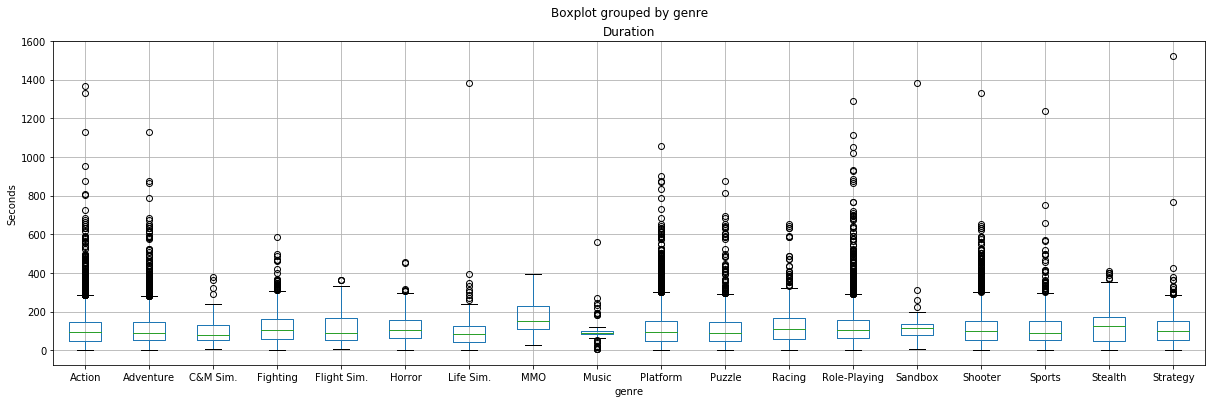

In [7]:
fig, ax = plt.subplots(figsize=(20,6))
plt.suptitle('')
df_pred.boxplot(column='Duration', by='genre', ax=ax)
ax.set_ylabel('Seconds')
plt.show()

Except for two specific game genres, the boxplots above show that the majority of the MIDIs have an IQR concentrated between 50 to 150 seconds, regardless of game genre. This seems to indicate no correlation can be drawn between duration of music pieces and game genre. 

The first noteworthy exception, is MMO's game music. Its IQR range from 115 to 225 seconds, considerably higher than other genres, and its the only genre to not have outliers. This difference can easily be explained from a game design point of view : MMO are designed to be played longer than other games, due to their monthly subscription system, in opposition of the "buy once" system of most other games. Thus, the player needs to be constantly entertained, and should feel bored at a later rate than normal games, having longer songs to hear means they will likely hear less frequently such song, thus dimishing the sense of boredom.

The second exception is Music's (or more commonly called "Rhythm") game music, which has a very narrow IQR ranging from 83 to 99 seconds, with its minimum and maximum close to this range. Upon inspecting what type of game are classified under the "music" genre, mainly games from the "Dance Dance Revolution" franchise are present. As its name tells, this is a dancing simulator franchise. Therefore it makes sense from a game design perpective to have consistently short songs, as dancing can easily be exhausting to the casual player short songs are easier to digest. The standardized duration makes it so that players are not hesitating to enter a dance that might be too long or not, as they know what song length to expect. 

In [8]:
df_genres[df_genres['tgdb_genres'] == '[\'Music\']'].groupby(by='game').size()\
    .reset_index(name='counts').set_index('game')

,counts
game,
Beatmania - Complete Mix,1
Beatmania IIDX,9
Beatmania IIDX 3rd Style,1
Beatmania IIDX 7th Style,3
Dance Dance Revolution 1st Mix,1
Dance Dance Revolution 3rd Mix,12
Dance Dance Revolution 4th Mix,11
Dance Dance Revolution 5th Mix,4
Dance Dance Revolution 6th MIX,1


### 3. Pitch Registers 

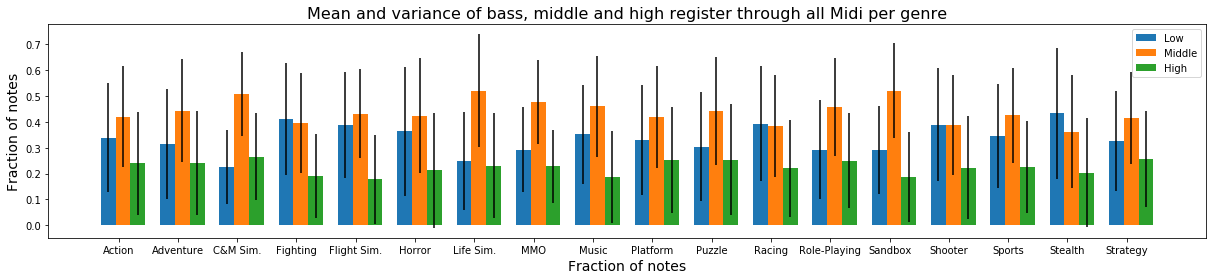

In [9]:
#Dynamic range distribution according to genre :
hi = "Importance_of_High_Register"
mid = "Importance_of_Middle_Register"
lo = "Importance_of_Bass_Register"

dyn_df = groupby_stats[[hi, mid, lo]]    
ind = np.arange(len(dyn_df))
fig, ax = plt.subplots()
width = 0.25
rects_lo = ax.bar(ind, dyn_df[lo]['mean'], width, yerr=dyn_df[lo]['std'])
rects_mi = ax.bar(ind+width, dyn_df[mid]['mean'], width, yerr=dyn_df[mid]['std'])
rects_hi = ax.bar(ind+2*width, dyn_df[hi]['mean'], width, yerr=dyn_df[hi]['std'])
    
ax.legend((rects_lo[0], rects_mi[0], rects_hi[0]), ('Low', 'Middle', 'High'))
ax.set_xticks(ind + (width+0.1) / 2)
ax.set_xticklabels(games_genre)

ax.set_title('Mean and variance of bass, middle and high register through all Midi per genre', size=16)
ax.set_ylabel('Fraction of notes', size=14)
ax.set_xlabel('Fraction of notes', size=14)
fig.set_size_inches((17,4))
plt.tight_layout()
plt.show()


The feature of Bass/Middle/High register is simply the fraction of all notes of a certain Midi Pitch range over the total number of notes. jSymbolic mapped the three registers this way : 
* Bass => [0, 54] 
* Middle => [55, 72] 
* High => [73, 128]

As showed by the black line on the bars, there is a pretty huge variance for all values of frequency register, which indicates that each game genre does not seem to have a signature pitch range register. If the focus is put on the mean only, all MIDI have the rather same register distribution: most notes are in the middle, then a considerable part in the low, and a minority in the High.

Only 4 genres seems to break away from this trend : Racing, Shooter, Fighting, and Stealth games. All of them have a Low register that is higher or as strong as the middle one. The only common point between those games genres is a loose competitive/high-scoring component. This might be far-fetched, but low pitches could be reminiscent of masculine sounds to player, and thus evoke some viril comportement that could drive the player to be more engaged in competitive game play.

However this hypothesis should be considered very weak in regard to the research question as the huge variance could mean such pattern would be a statistical mishap.

### 4. Rhytmic Metrics

#### 4.1. Tempo

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Number of midis filtered because of hellish tempo : 52


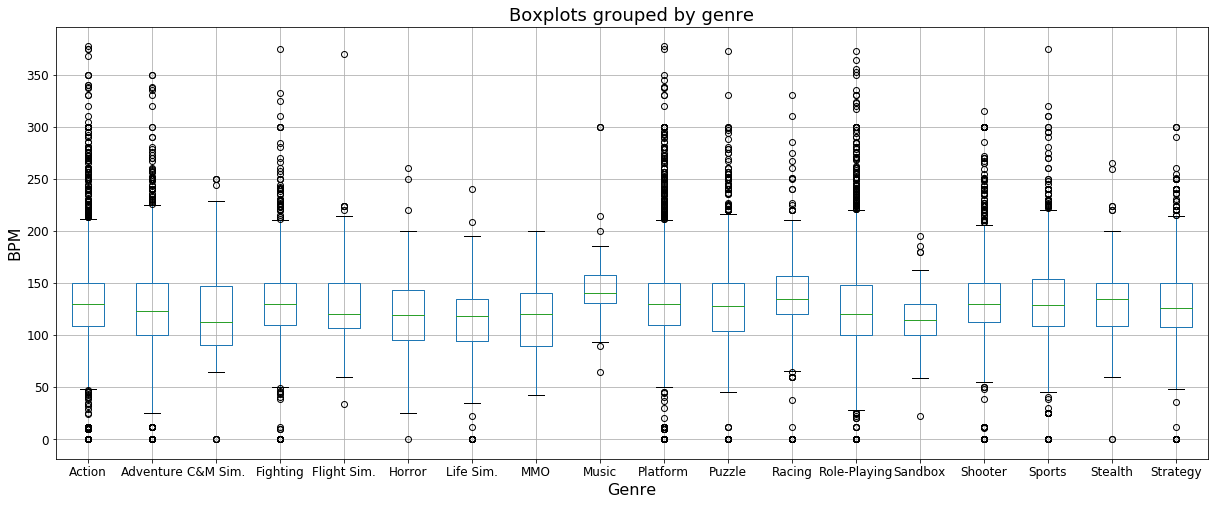

In [10]:
#Initial tests showed that a group of songs scored an initial tempo above of 400. 
midi_filtered = len(df_pred[df_pred['Initial_Tempo'] >= 400])
df_pred_tempo_filt = df_pred[df_pred['Initial_Tempo'] < 400]
fig, ax = plt.subplots(figsize=(20,8))
df_pred_tempo_filt.boxplot(column='Initial_Tempo', by='genre', ax=ax, fontsize=12)
ax.set_ylabel('BPM', size=16)
ax.set_xlabel('Genre', size=16)
ax.set_title("Boxplots grouped by genre", size=18)
plt.suptitle('')
print("Number of midis filtered because of hellish tempo : "+ str(midi_filtered))
plt.show()

52 Midis were left out of the analysis, as they had tempo of over 400, which seems like a unrealistic bpm probably set by unexperienced or foolish users from tgmdb archive.
Before interpreting the results, it should be noted that tempo does not necessarily correlate with a song speed, or perceived fastness. A song apparently in 180 BPM could only have whole notes through the whole piece, thus giving a very slow-paced feeling for a high tempo. Also, a user might sequence a video game music of 120 BPM into a MIDI of 60 BPM, mapping quarter notes to eighth notes.

Initial Tempo shows more difference between genres than MIDI duration already. The most remarkable genre is again the "Music" one, with a narrow high-placed IQR. This is quite obvious considering that most of the Music games are dance simulator, and more rhytmed songs are more enjoyable to dance for the common player.

Racing Games also seems to have higher tempo than most of the other genres, which would maybe encourage player to display a more nervous game play style to drive them to the finish line faster.

Sanbox games on the opposite, have more slow-paced midis, which would go along with the game design choice of exploration, limitless discovering and building that goes along with sandbox games.


#### 4.2.1 Temporal Metrics

In [11]:
temporal_metrics = df_pred.copy()
map_ = ['Simple', 'Compound', 'Triple', 'Quintuple']
temporal_metrics['Quintuple_Meter'] *= 3
temporal_metrics['Triple_Meter'] *= 2
temporal_metrics['Compound_Or_Simple_Meter'] *= 1
temporal_metrics['QTC_Meter'] = (temporal_metrics['Quintuple_Meter'] +\
                                 temporal_metrics['Triple_Meter'] +\
                                 temporal_metrics['Compound_Or_Simple_Meter'])\
                                .map(lambda x: map_[int(x)])
    
fig, ax = plt.subplots(figsize=(20,10))

ax.set_ylabel('Fraction of songs', size=24)
ax.set_xlabel('Fraction of songs', size=24)
ax.set_title('Repartition of ryhtmic metrics acccording to game genre',y=1.05, size=26)

temporal_metrics = temporal_metrics.groupby(by=['genre', 'QTC_Meter']).size().unstack().fillna(0)
temporal_metrics.divide(temporal_metrics.sum(axis=1), axis=0)[map_].plot(kind='bar', stacked=True, ax=ax, fontsize=20)

plt.tight_layout()
fontP = FontProperties()
fontP.set_size('xx-large')
plt.legend(prop=fontP, bbox_to_anchor=(1.0, 0), loc='lower left');

The 4 categories displayed here come frome 3 features that together, are able to indicate which metric the MIDI piece starts in. The "triple" feature means wether the numerator of the time signature is 3 (3/4, 3/8, etc...), similarly, "quintuple" means a 5 for the time signature's numerator (5/4, 5/8, etc...). "Compound" means that the numerator is a multiple of 3 greater than or equal to 6, but evenly divisible (so 6/4, 6/8, 12/8, etc...). If none of those features are set to the truth value of 1.0, then the MIDI is in simple metric (i.e. 2/2, 4/4, 8/8, etc...).

This again shows a small limitation of the design, as there exists no feature to account for other odd time signature such as 7/8, 15/16 and others. It would seem likely that such pieces occur rarely in practice. Nonetheless they would be mapped to the "simple" category in the jSymbolic system which is erronous.

As with most features seen up until now, no conclusion can be drawn out of those feature other that than the vast majority of the dataset (more than 90% for each genre) is in simple metric. Such a finding obviously does not help differentiate game genre out of the game music. 

#### 4.2.2 Metrical Diversity

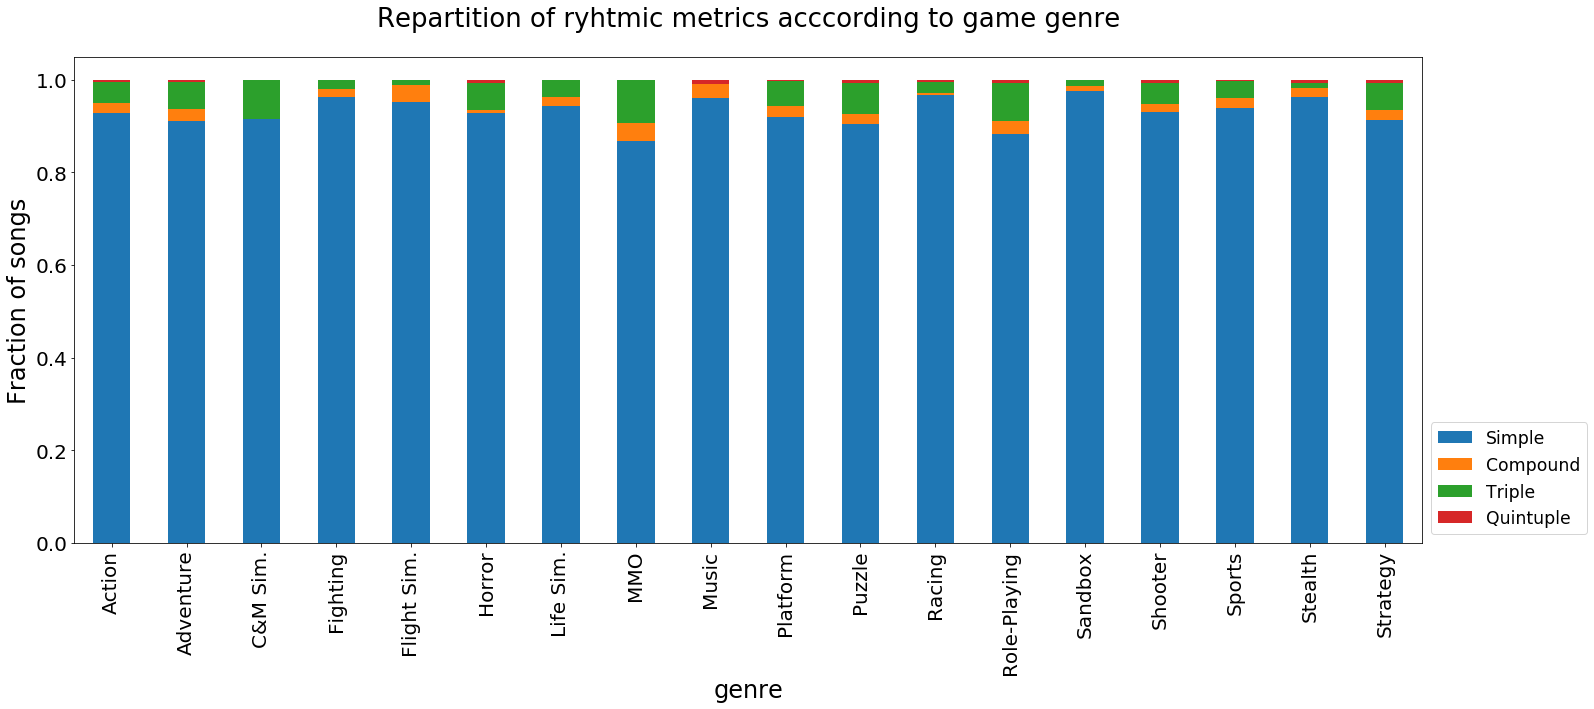

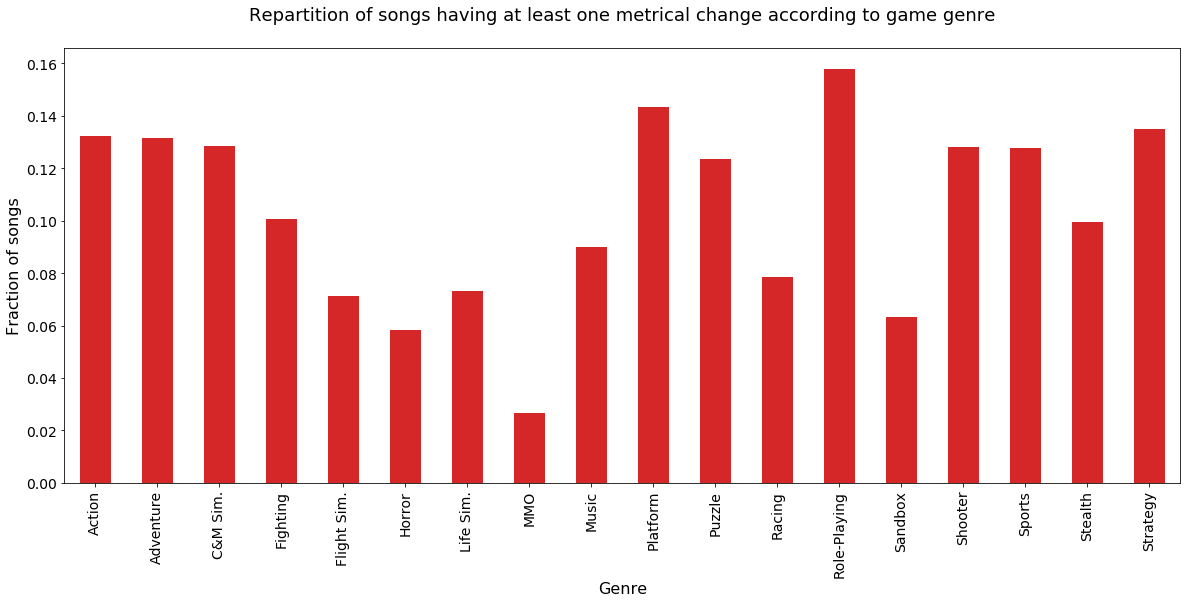

Fraction of pieces with metric change : 0.13


In [12]:
fig, ax = plt.subplots(figsize=(20,8))

groupby_stats['Metrical_Diversity']['mean'].plot(kind='bar', ax=ax, fontsize=14, color='#d62728')
ax.set_ylabel('Fraction of songs', size=16)
ax.set_xlabel('Genre', size=16)
ax.set_title('Repartition of songs having at least one metrical change according to game genre',y=1.05, size=18)
plt.show()
print("Fraction of pieces with metric change : %.2lf"%(df_pred['Metrical_Diversity'].mean()))

There exists a fourth feature related to a song's metric, which indicates wether a Midi piece encounters at least one metric change from the beginning until the end. Surprisingly, this features shows great variety between all genres. It should be noted however that this feature only applies to 13% of midi pieces of the dataset.
The most noteworthy genre with this feature, is Role-Playing, whose 16% of songs have metric change in it. Metric change in a song oftens brings some progressive elements to the listener ear, as changing metric changes the flow and anticipiation of song. In the case of role-playing game, this could reflect the more complex game-play and possibilities of changing the pace the player can have with character customization which is a core feature of role-playing game. 

However this hypothesis should be considered weak as the role-playing genre only has 3% more than the mean of all the games for this feature, and this argument could be applied to other genre that have a close portion to this score. Notably, the MMO genre display a very low percentage of 3% of metric change for all its midi piece. This results is quite astonishing as the MMO genre is often coupled with the RPG one (notable example such as World Of Warcraft, Guild of Wars, Elder Scrolls Online come to mind), but this weird inbalance might just come from a small bias in representativeness, as only 79 midi represent the MMO genre in this feature analysis.  

## Synthesis & next steps
The feature analysis so far covered 6 musical components from 10 individual features out of the 157 generated by jSymbolic for each MIDI. Except maybe tempo and metrical diversity, none of these features showed diversity across genres, meaning the research question is clearly not confirmed, but rather highly challenged by those findings for now. It might be possible that wrong features were looked at, as less than 7% of the features were observed. The feature selection was done in a top-down fashion, as more global and easy to understand elements were tackledd first. However those features are maybe too general and broadly defined in order to isolate musical properties for video game genre. 
Regardless of methodology concern, those results are rather disappointing for a first approach. 

The next step would be to tackle features analysis differently, rather than a top-down approach, focus directly on the core of what make a video game music recognizable : its melody. To do so, the focus should be put on a precise selection of feature that are directly related to melody. Furthermore out of the remaining 147 features, certains of them are irrelevant considering the very nature of video game music, and many can not be considered reliable because of the user-submitted origin of the dataset. 

Firstly, jSymbolic is a software whose purpose is to extract features from more conventionally produced music, meaning it expect to receive MIDIs encoded out of jazz, rock or even classical song. A range of 11 features focused on prevalence of specific instruments tied to those genres such as "prevalence of electric guitar" or "prevalence of violin". Even though more modern video game music are arranged using those kinds or physical instruments, early video game music composition was constrained by the primitive sound synthetizer chip available on the console hardware, meaning only few channel (close to 3-4) were available. Furthermore, they could only produce simply textured sounds such as triangle or saw-tooth sine vaweforms. As previously stated, a big part of the MIDIs from the dataset come from this early era of video game, meaning those features are not of interest for the analysis of video game genre.

Secondly, some of jSymbolic's features are expecting MIDIs encoded with a certain degree of proficiency. There are 10 features computed out of the velocity/loudness of pitch items of the MIDIs. The user submitted policy does not gives any garanty wether the tgmdb sequencers took care of giving dynamics variation of their retranscription of music song. Furthermore some users might have put the default velocity value for all notes, or put the maximum velocity. Thus, all those features are considered unreliable for the analysis.

Already 20 features can thus be left out of the scope of the analyis, but further work on the features nature and meaning will be made to flesh out the core group of features that relates to the melody and the harmony of a video game music.

## Milestone 4 : Tackling Harmony and Melody

Conveniently, jSymbolic has a few dozens features that directly relate to raw (in the sense of non considering the piece's arrangement) harmony, intervals and melody. Similarly to the previous milestone, all those features are analysed and interpreted through different comparative data visualisations, to see which features characterizes special games genres.

### "Vertical" Analysis

#### Intervals
The first aspect of harmony analysed is what jSymbolic calls "Vertical" harmony, which means every point in the MIDIs where two notes are played at the same time. This serves the basis for features that count fractions and ratio of intervals, triads, and chords. The graphs below display violinplot of the fractions of presence of all intervals, from the unison, to the octave. (Note that thirds have their own feature to disambiguate between minor and major).
As this represents a lot of features to interpret between 15 genres, only the 6 most represented genres were analysed.

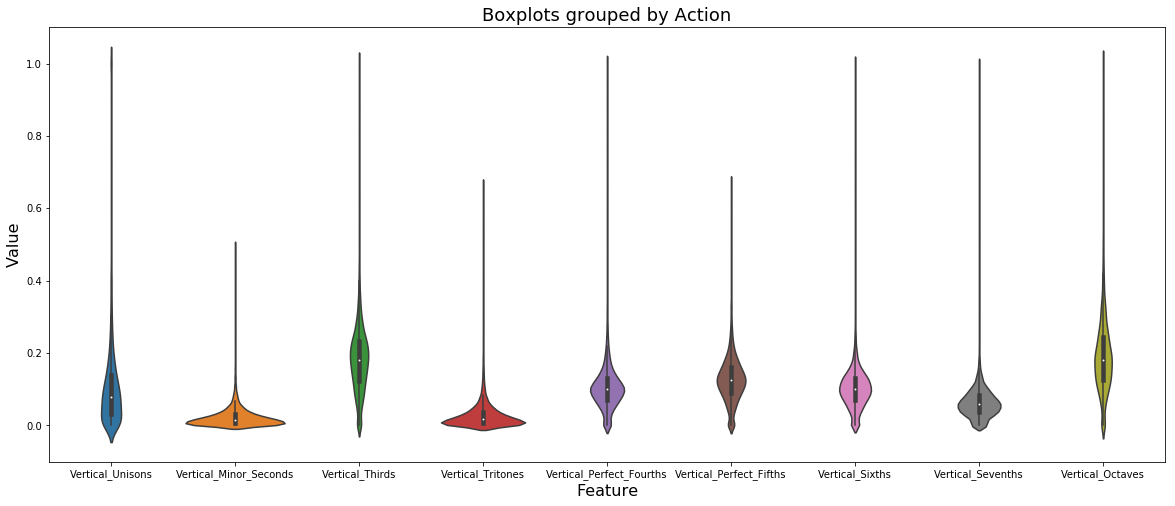

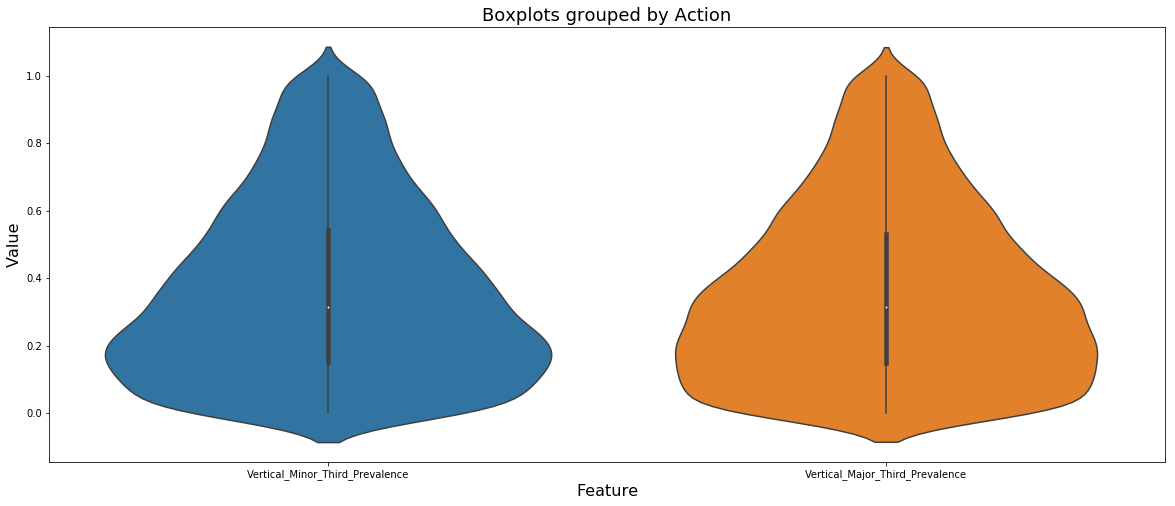

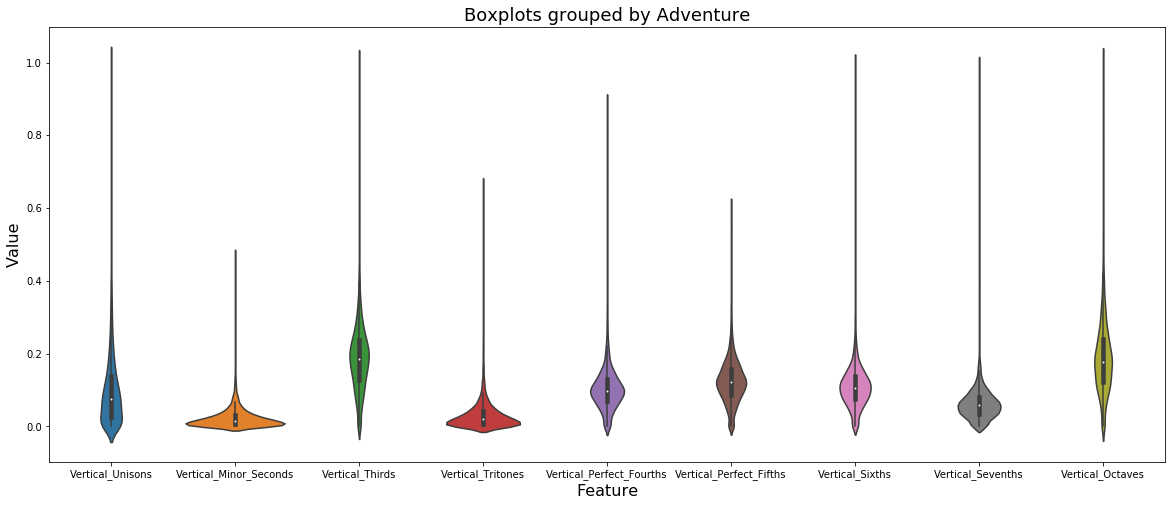

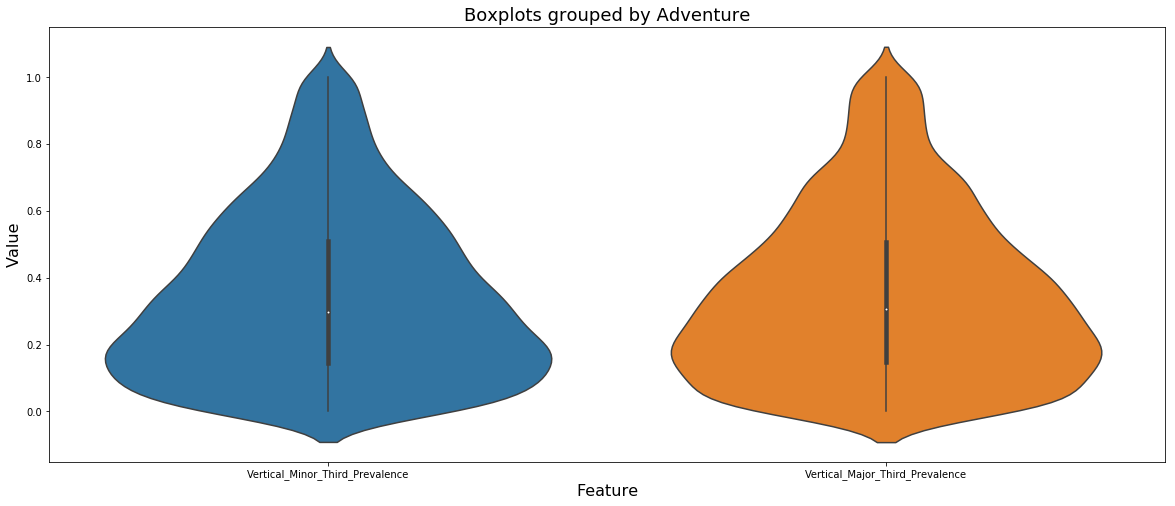

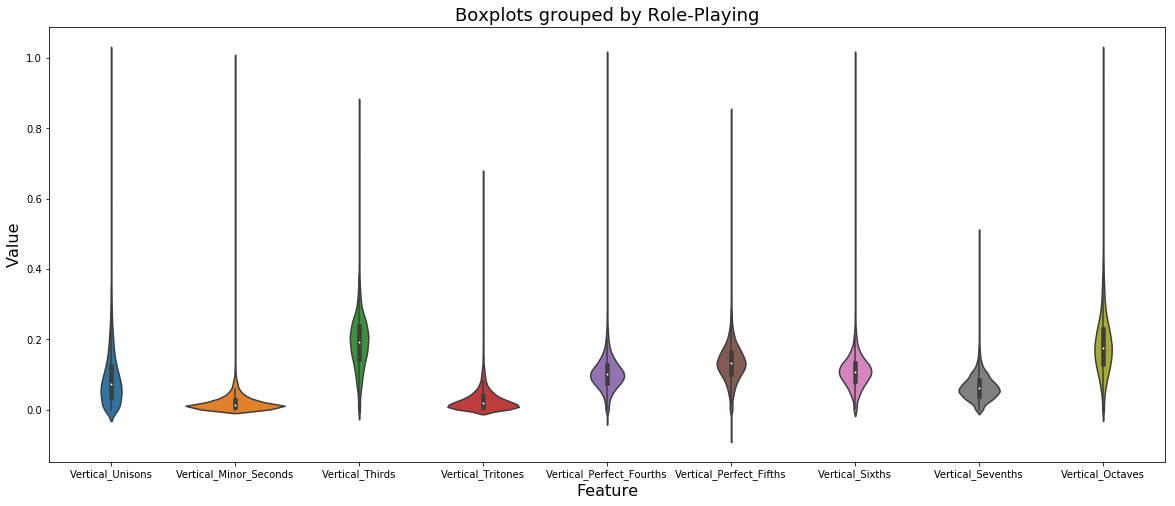

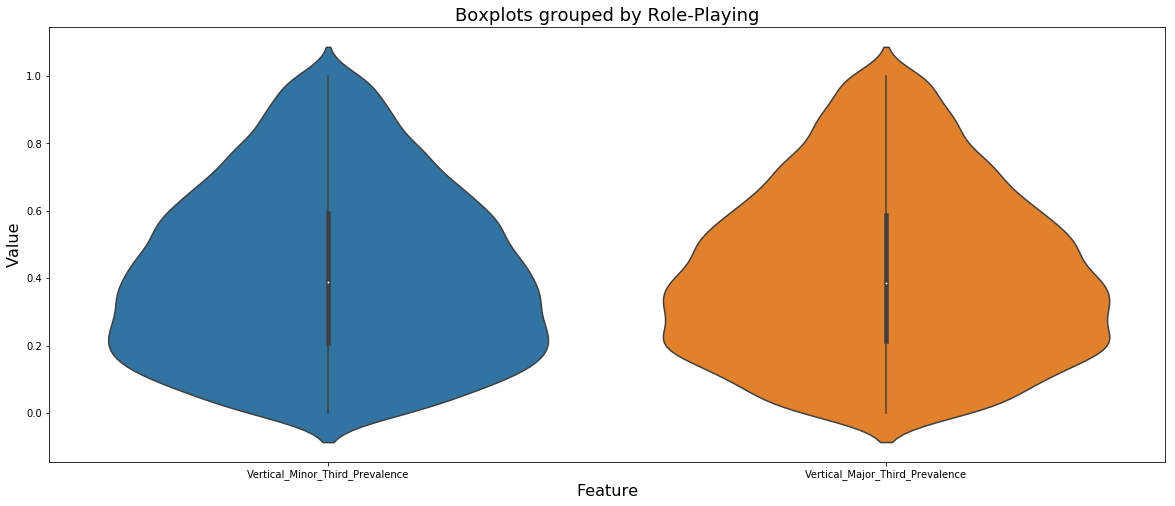

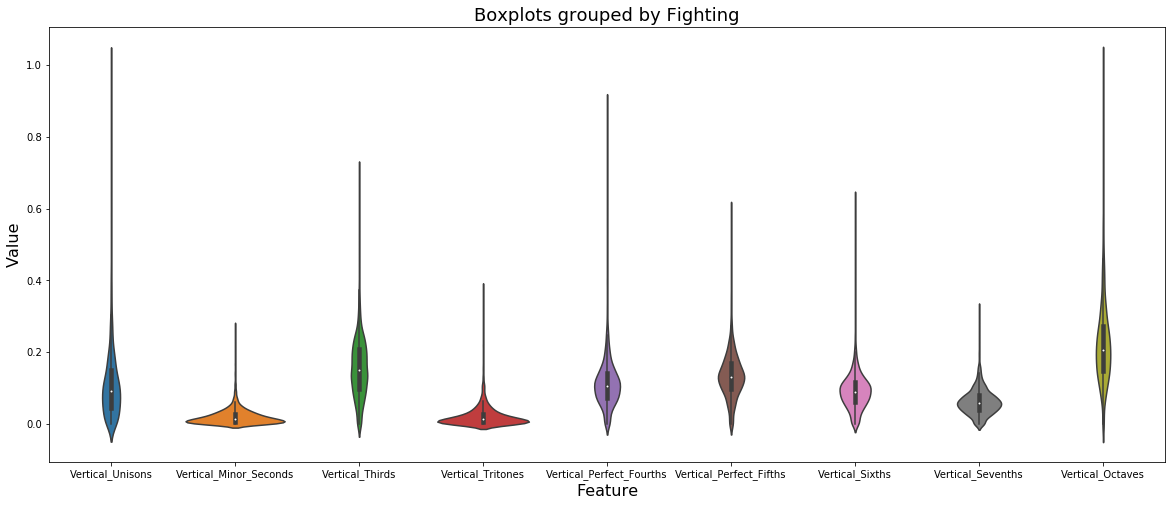

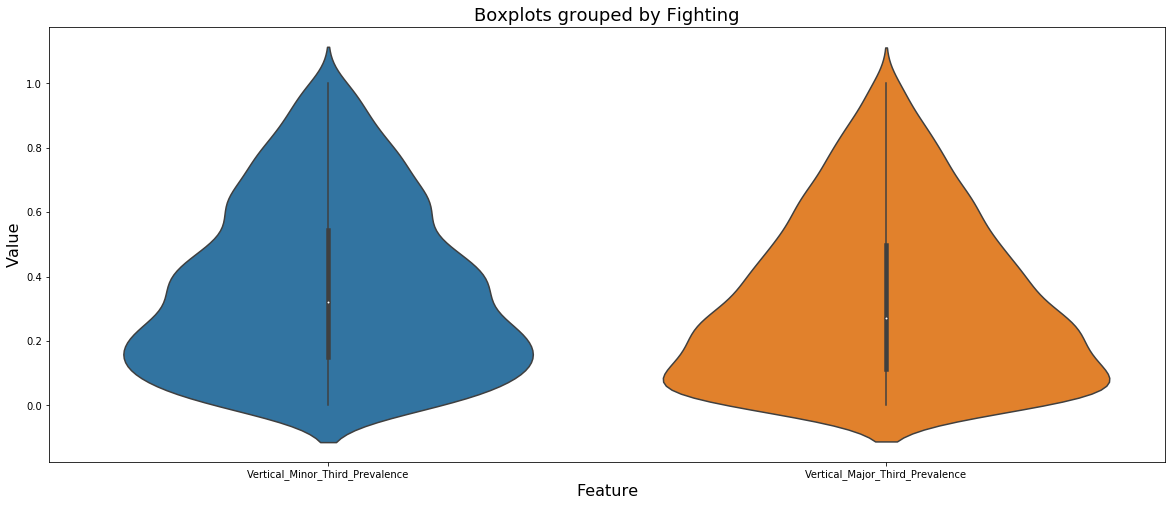

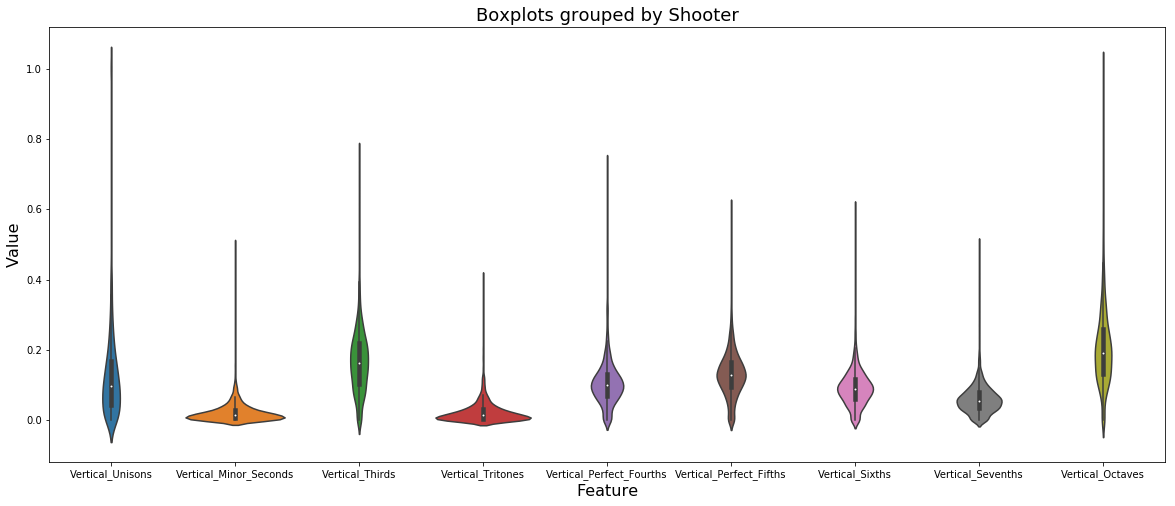

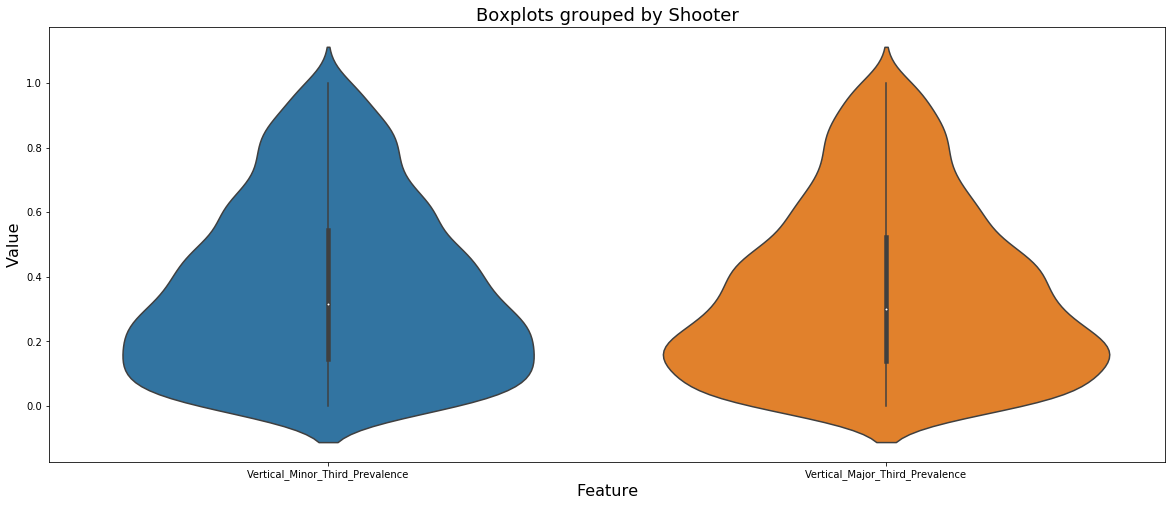

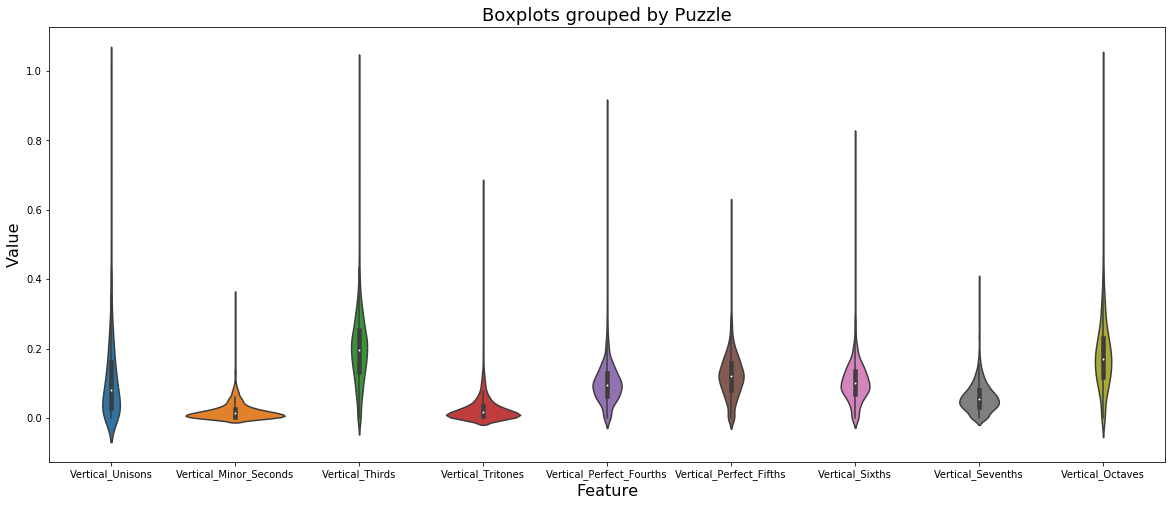

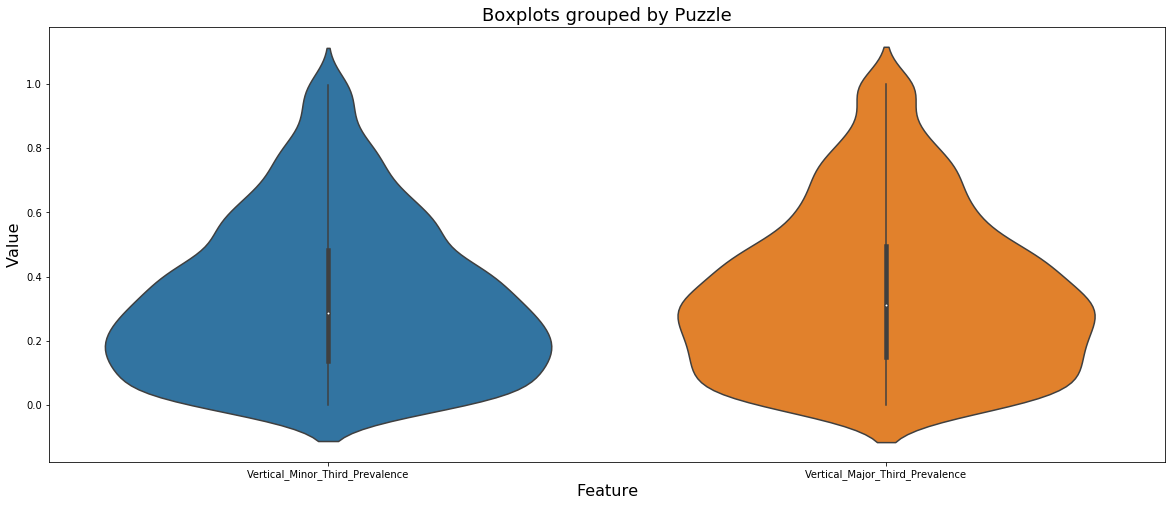

In [30]:
def boxPlotByGenre(genre, features, df):
    df_one_genre = df.loc[df['genre'] == genre]
    values = pd.Series(np.hstack([df_one_genre[feature] for feature in features]))
    names = pd.Series(np.hstack([[feature] * len(df_one_genre) for feature in features]))
    data = pd.DataFrame({'values': values, 'features': names})
    fig, ax = plt.subplots(figsize=(20,8))
    sns.violinplot(x='features', y='values', data=data, ax=ax)
    ax.set_ylabel('Value', size=16)
    ax.set_xlabel('Feature', size=16)
    ax.set_title("Boxplots grouped by %s"%genre, size=18)
    plt.suptitle('')
    plt.show()
    

intervalArray = ['Unisons', 'Minor_Seconds', 'Thirds', 'Tritones', 'Perfect_Fourths',\
                 'Perfect_Fifths','Sixths','Sevenths', 'Octaves']
minMaj = ['Vertical_Minor_Third_Prevalence', 'Vertical_Major_Third_Prevalence']
intervalFeatures = ['Vertical_'+x for x in intervalArray]

boxPlotByGenre('Action',intervalFeatures, df_pred)
boxPlotByGenre('Action',minMaj, df_pred)
boxPlotByGenre('Adventure',intervalFeatures, df_pred)
boxPlotByGenre('Adventure',minMaj, df_pred)
boxPlotByGenre('Role-Playing',intervalFeatures, df_pred)
boxPlotByGenre('Role-Playing',minMaj, df_pred)
boxPlotByGenre('Fighting',intervalFeatures, df_pred)
boxPlotByGenre('Fighting',minMaj, df_pred)
boxPlotByGenre('Shooter',intervalFeatures, df_pred)
boxPlotByGenre('Shooter',minMaj, df_pred)
boxPlotByGenre('Puzzle',intervalFeatures, df_pred)
boxPlotByGenre('Puzzle',minMaj, df_pred)

Most of the distributions of features seems to be equivalent across all genres. The prevalence of major and minor thirds is interesting, as the plots shows they have roughly the same distribution within each genre. When thinking about music in general this does make sense, as each chord is always one minor (respectively major) third followed by a minor (respectively major) third to construct a minor chord (respectively major). This means that a song that primarly uses classical triard for its harmony will feature a Minor to Major ratio of 1. Finding for one genre an unbalanced repartition of those features would have been interesting for interpretation however.

There is not much to say unfortunately for the dsitribution of the interval 

### Vertical Dissonance Ratio
Ratio of all wrapped vertical intervals that are dissonant (2nds, tritones, and 7ths to all wrapped vertical intervals that are consonant (unisons, 3rds, 4ths, 5ths, 6ths, octaves). This is weighted by how long each of these intervals are held (e.g. an interval lasting a whole note will be weighted four times as strongly as an interval lasting a quarter note). Set to 0 if there are no dissonant vertical intervals or no consonant vertical intervals.

### Perfect Vertical Intervals
Fraction of all wrapped vertical intervals that are unisons, perfect fourths, perfect fifths or octaves. This is weighted by how long intervals are held (e.g. an interval lasting a whole note will be weighted four times as strongly as an interval lasting a quarter note).

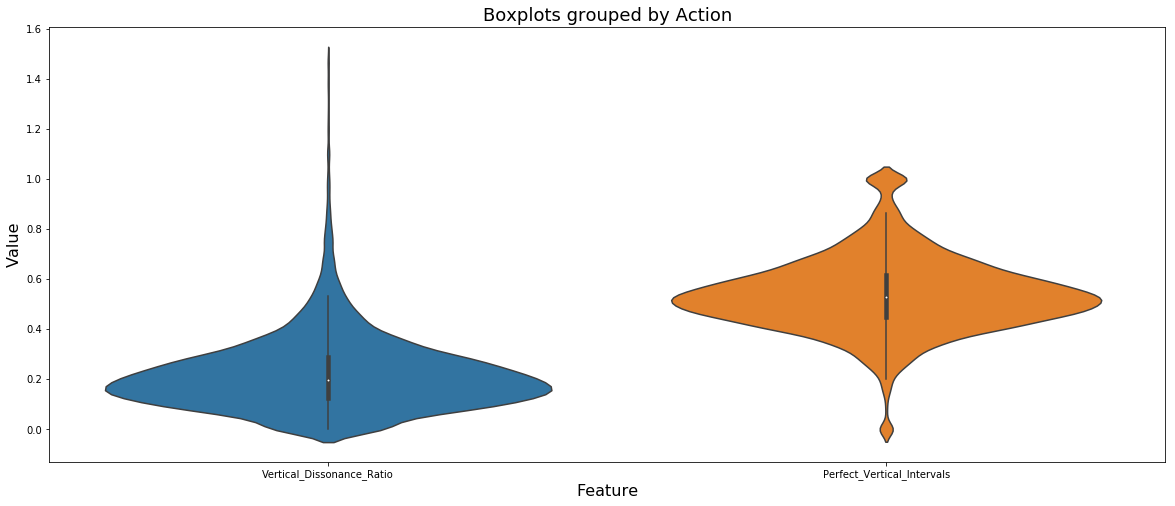

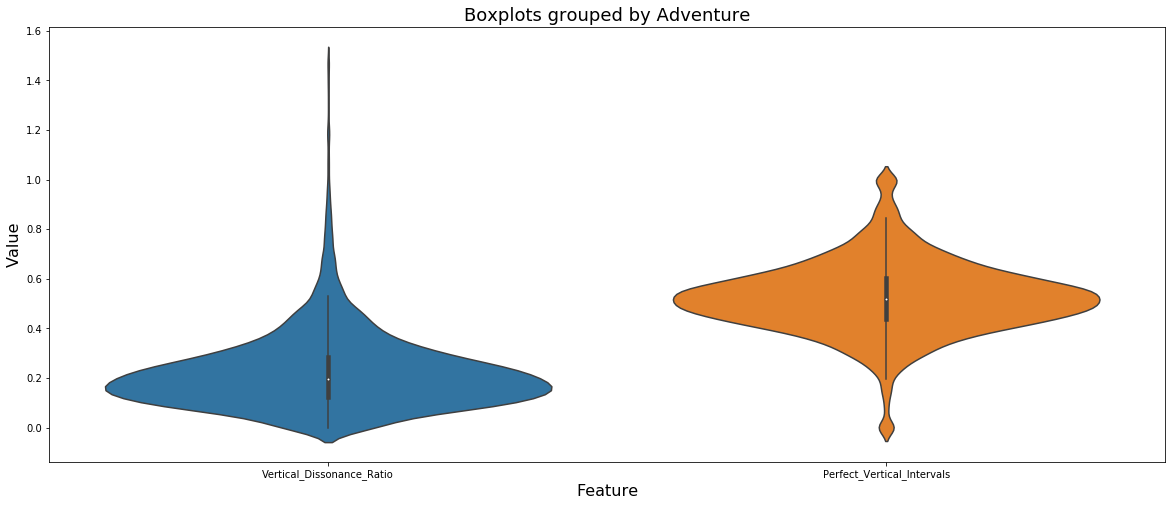

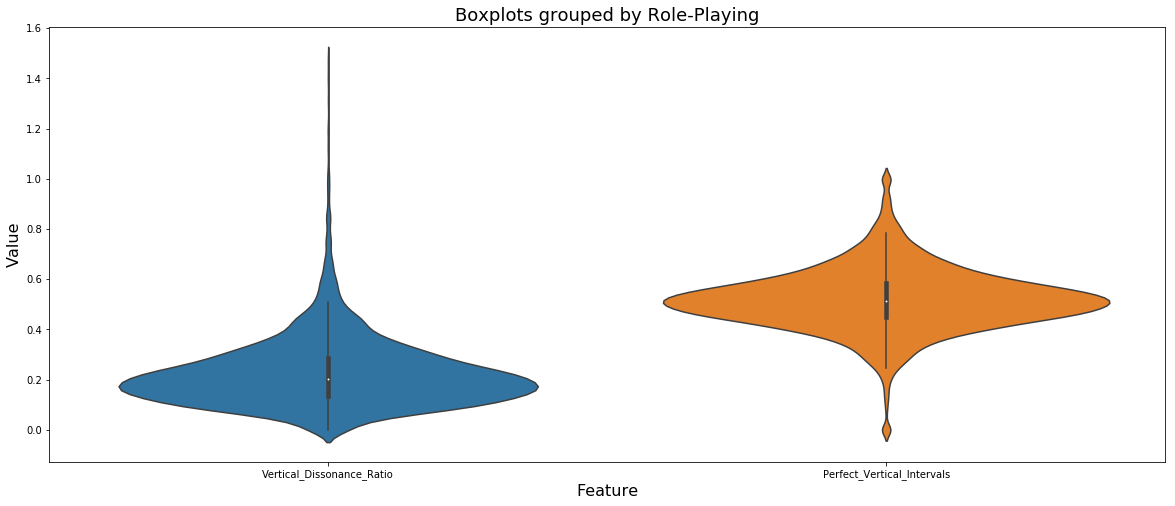

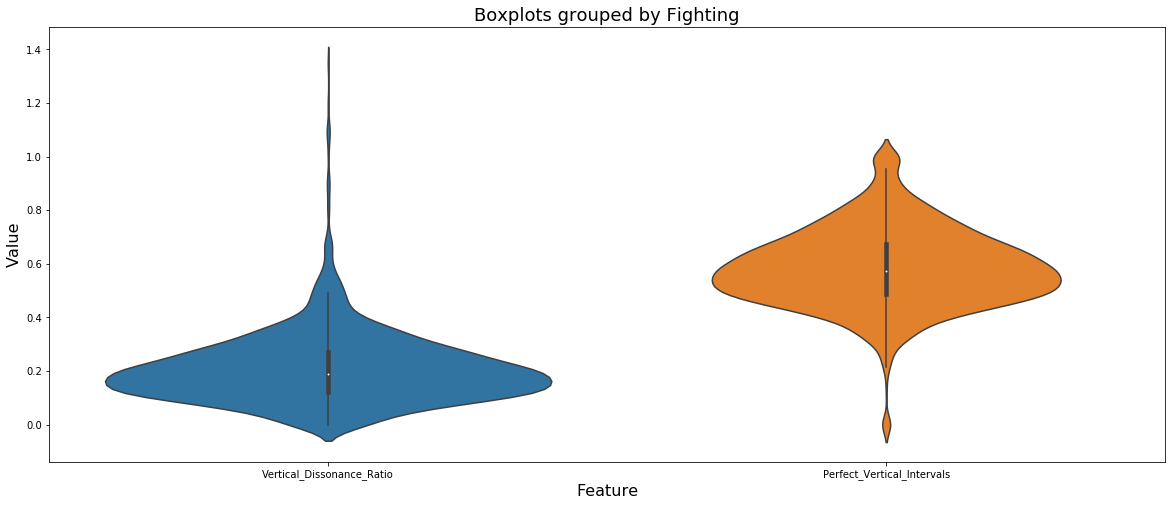

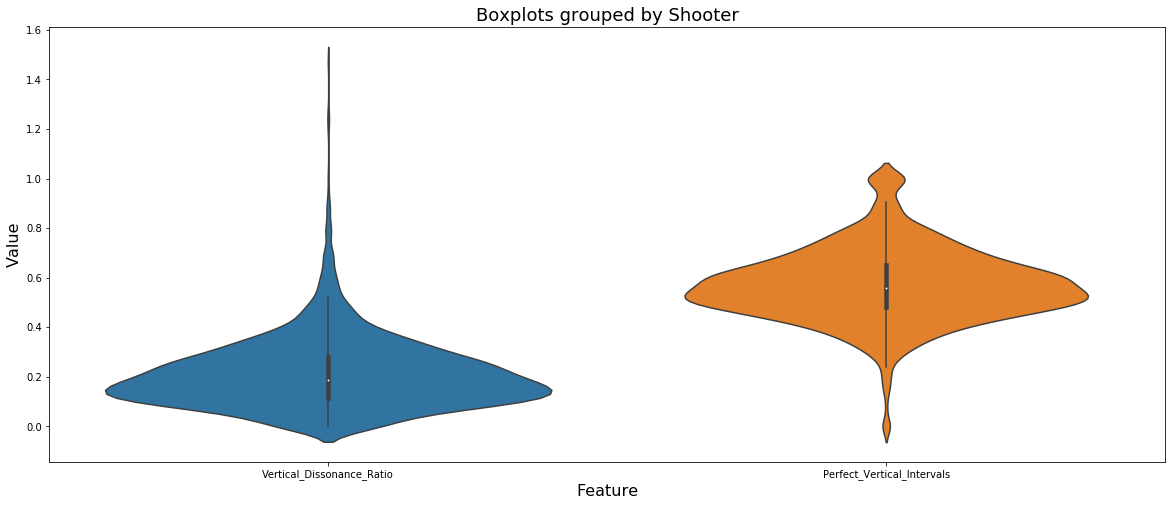

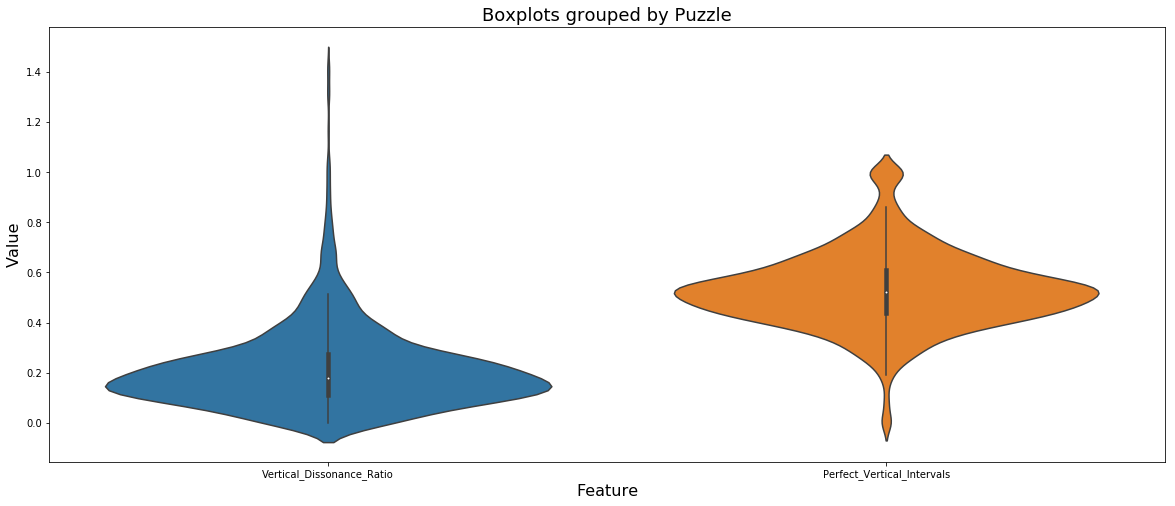

In [29]:
df_diss_filter = df_pred.copy()
df_diss_filter = df_diss_filter[df_diss_filter['Vertical_Dissonance_Ratio'] < 1.5]
perfectDiss = ['Vertical_Dissonance_Ratio','Perfect_Vertical_Intervals']


boxPlotByGenre('Action',perfectDiss, df_diss_filter)
boxPlotByGenre('Adventure',perfectDiss, df_diss_filter)
boxPlotByGenre('Role-Playing',perfectDiss, df_diss_filter)
boxPlotByGenre('Fighting',perfectDiss, df_diss_filter)
boxPlotByGenre('Shooter',perfectDiss, df_diss_filter)
boxPlotByGenre('Puzzle',perfectDiss, df_diss_filter)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


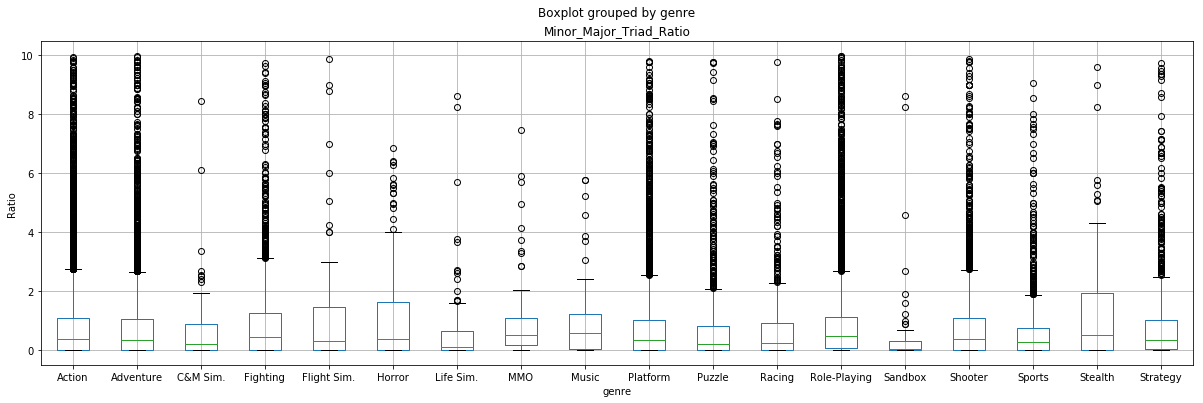

In [27]:
df_min_maj_filt = df_pred.copy()
df_min_maj_filt = df_min_maj_filt[(df_min_maj_filt['Minor_Major_Triad_Ratio'] < 10)]
fig, ax = plt.subplots(figsize=(20,6))
plt.suptitle('')
df_min_maj_filt.boxplot(column='Minor_Major_Triad_Ratio', by='genre', ax=ax)
ax.set_ylabel('Ratio')
plt.show()


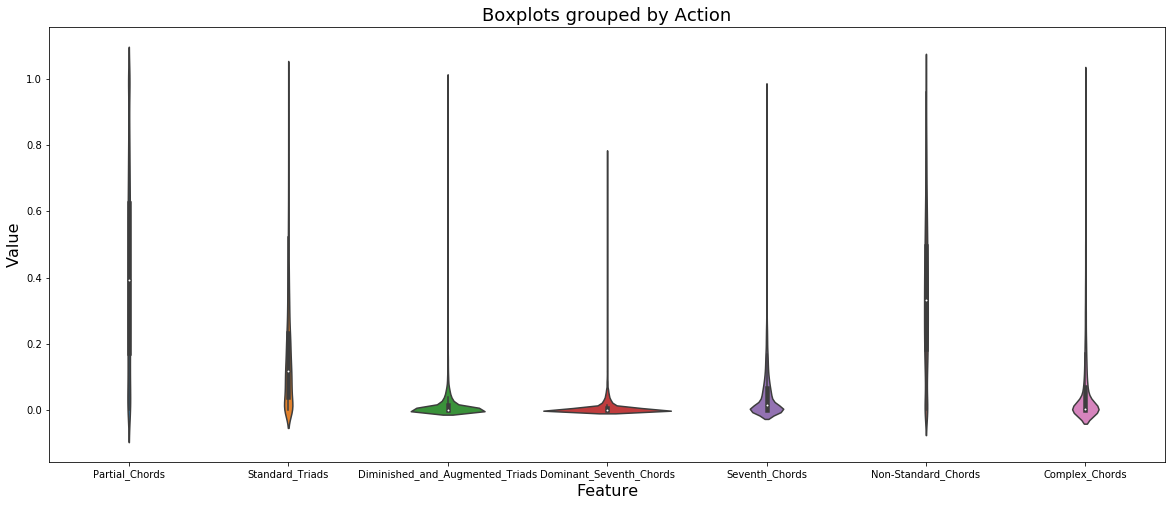

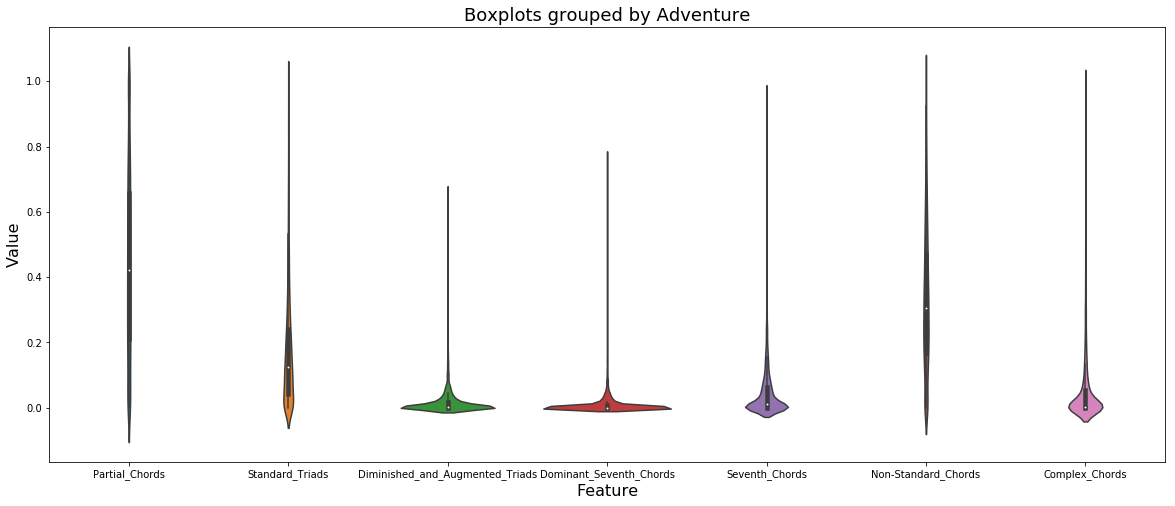

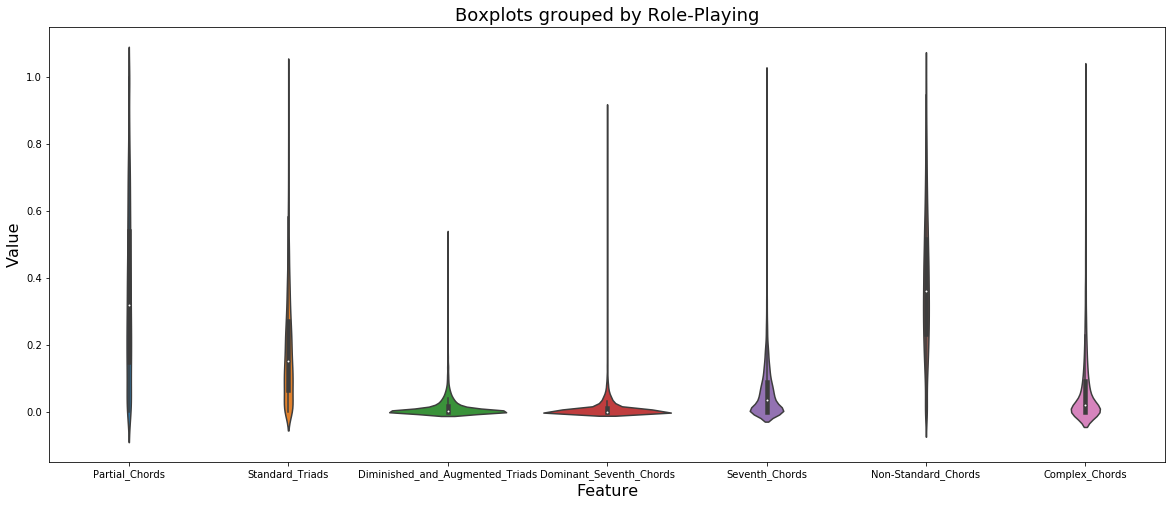

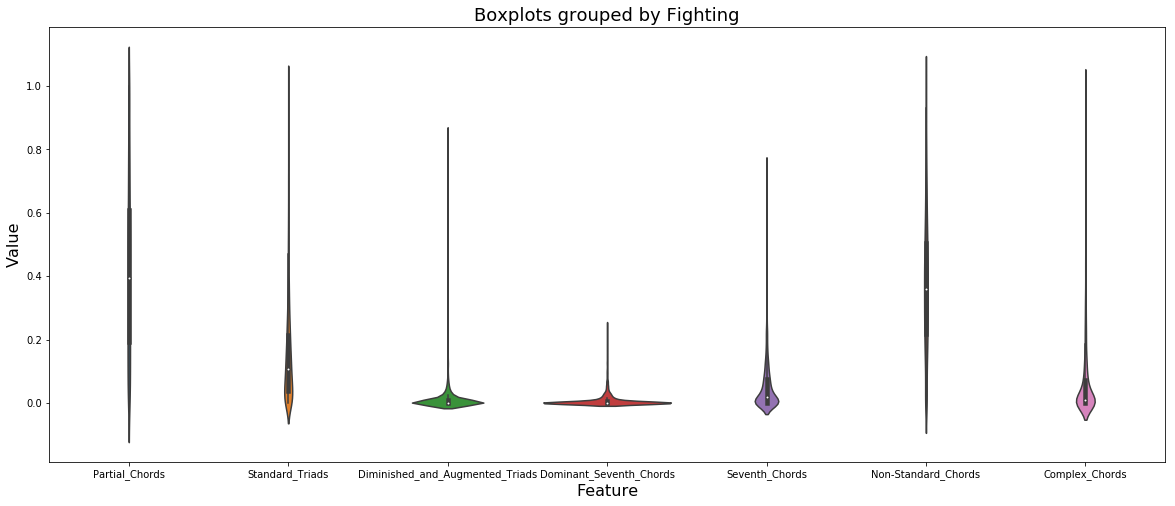

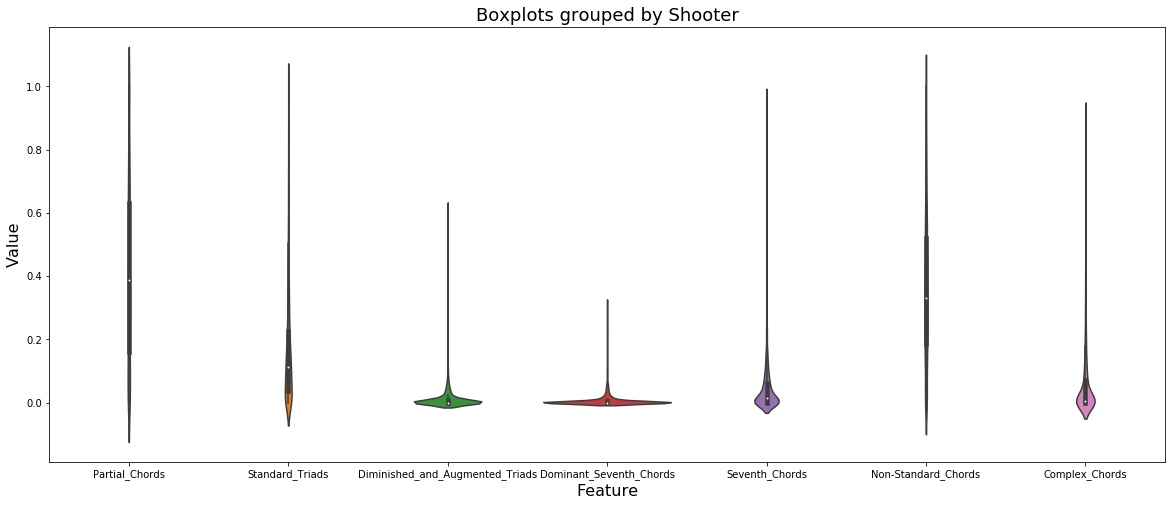

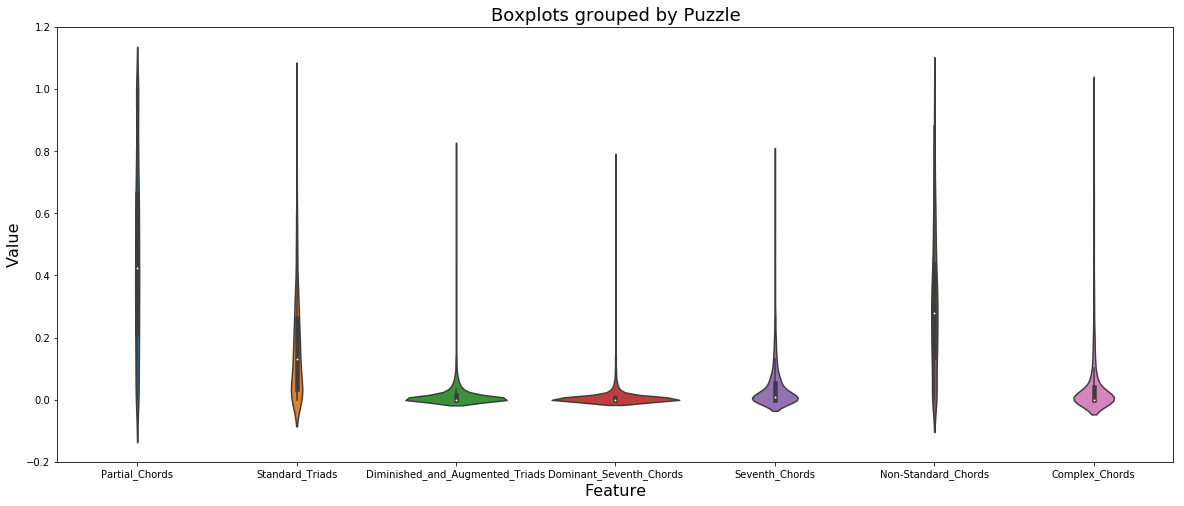

In [14]:
arr = ['Partial_Chords','Standard_Triads','Diminished_and_Augmented_Triads','Dominant_Seventh_Chords',\
'Seventh_Chords','Non-Standard_Chords','Complex_Chords']#,'Minor_Major_Triad_Ratio']

boxPlotByGenre('Action',arr, df_pred)
boxPlotByGenre('Adventure',arr, df_pred)
boxPlotByGenre('Role-Playing',arr, df_pred)
boxPlotByGenre('Fighting',arr, df_pred)
boxPlotByGenre('Shooter',arr, df_pred)
boxPlotByGenre('Puzzle',arr, df_pred)

## Horizontal Harmony

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


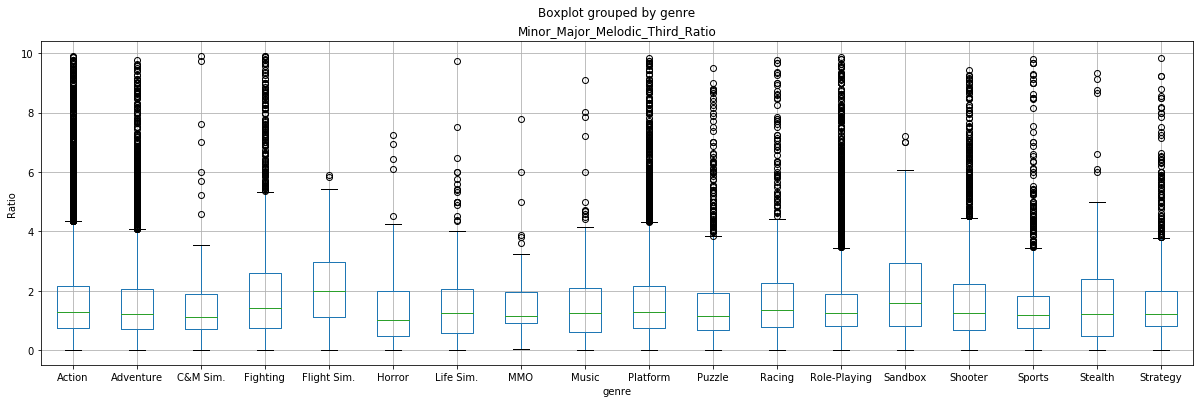

In [26]:
maj_min = 'Minor_Major_Melodic_Third_Ratio'
df_memim_filt = df_pred.copy()
df_memim_filt = df_memim_filt[df_memim_filt[maj_min] < 10]
fig, ax = plt.subplots(figsize=(20,6))
plt.suptitle('')
df_memim_filt.boxplot(column=maj_min, by='genre', ax=ax)
ax.set_ylabel('Ratio')
plt.show()


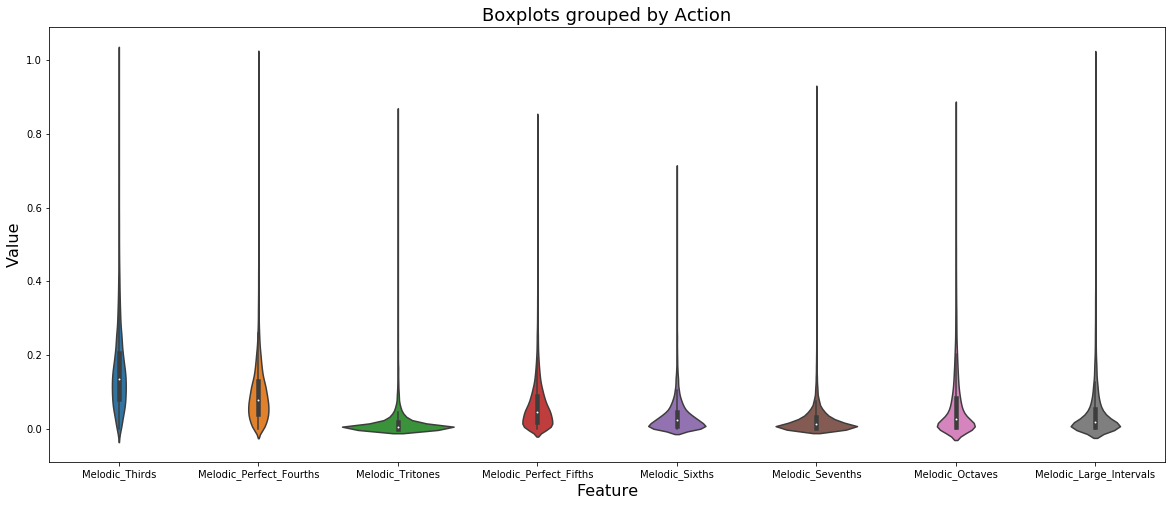

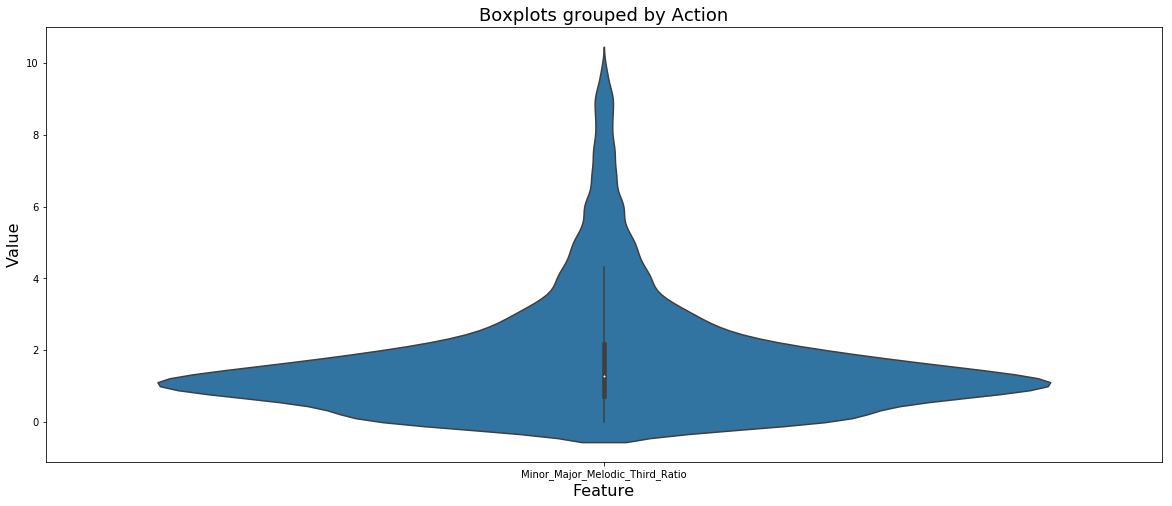

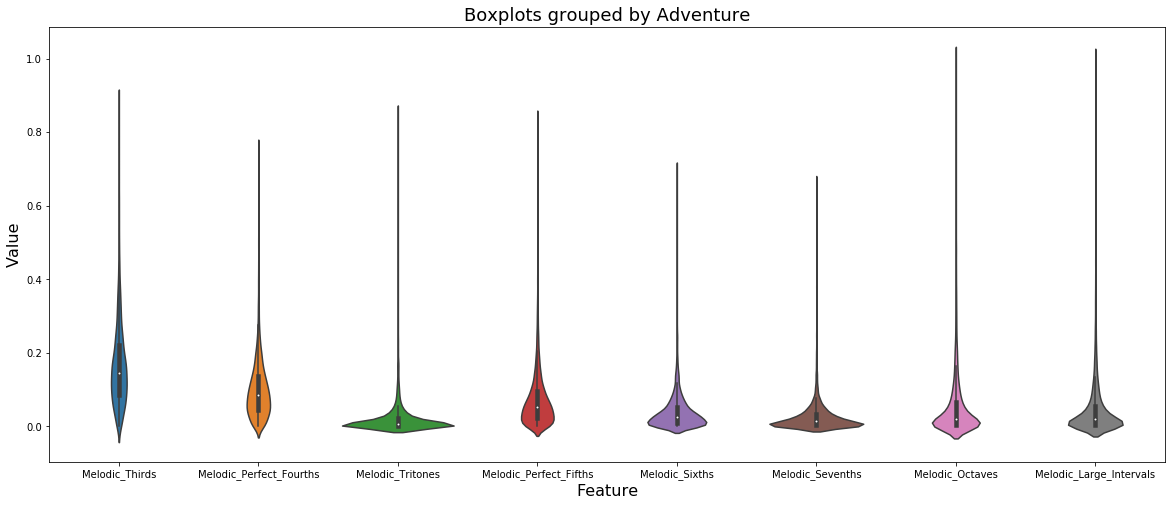

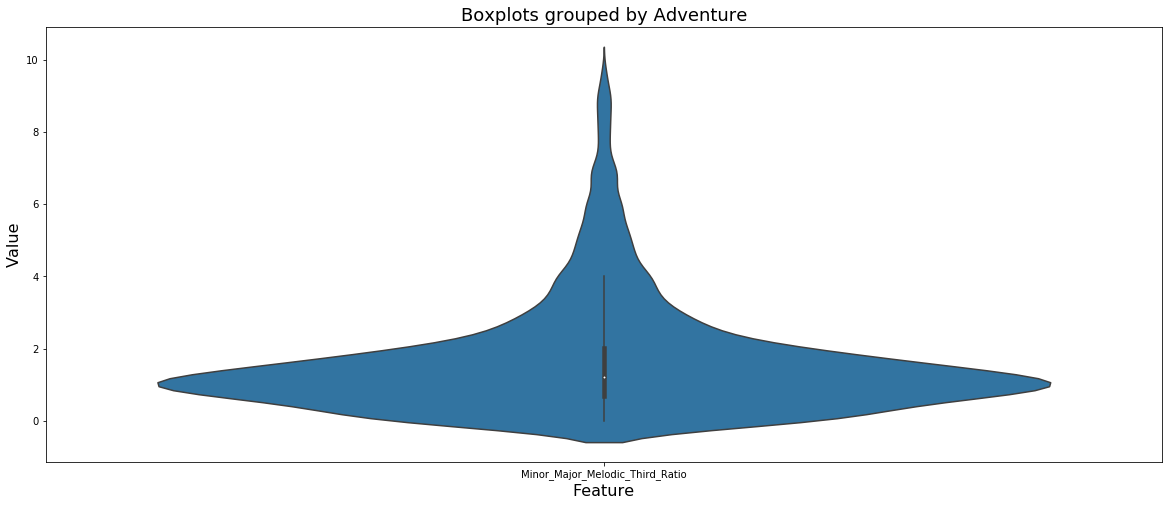

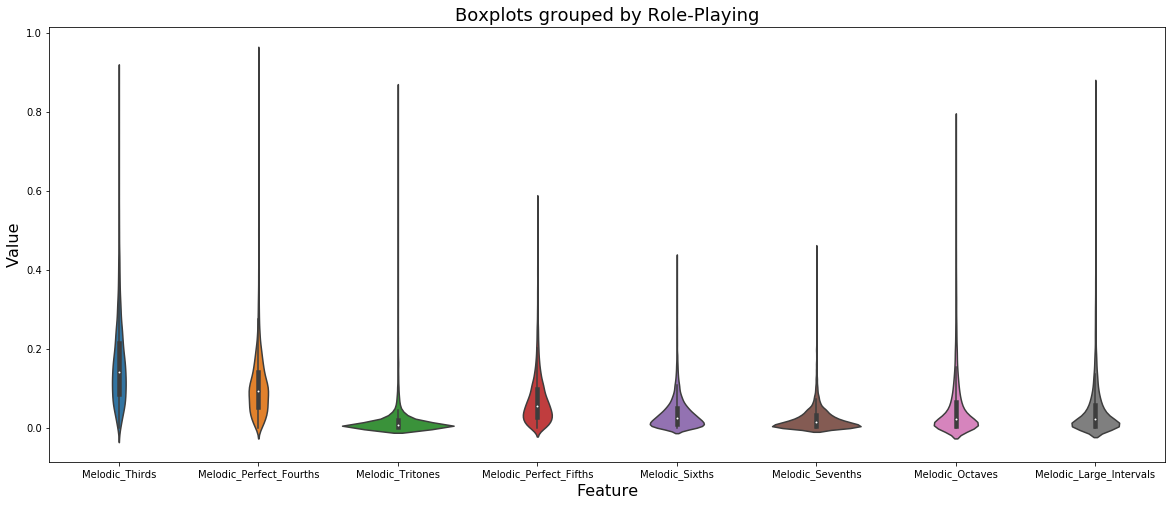

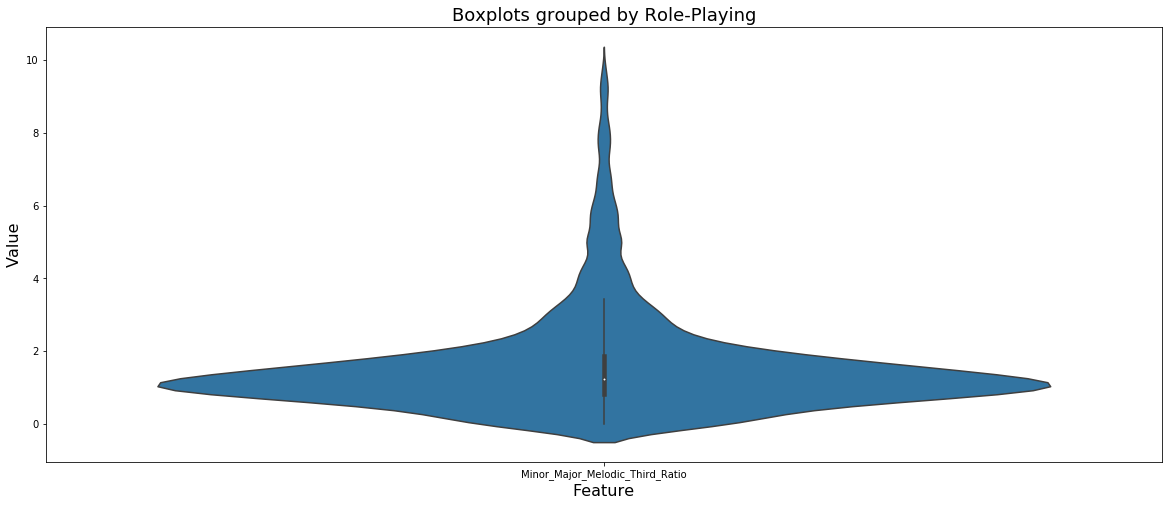

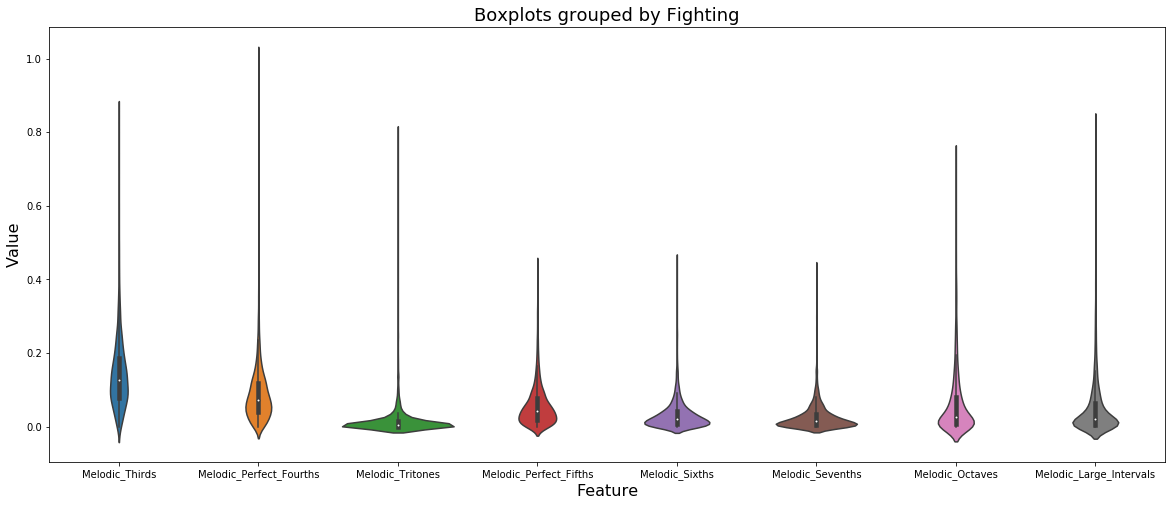

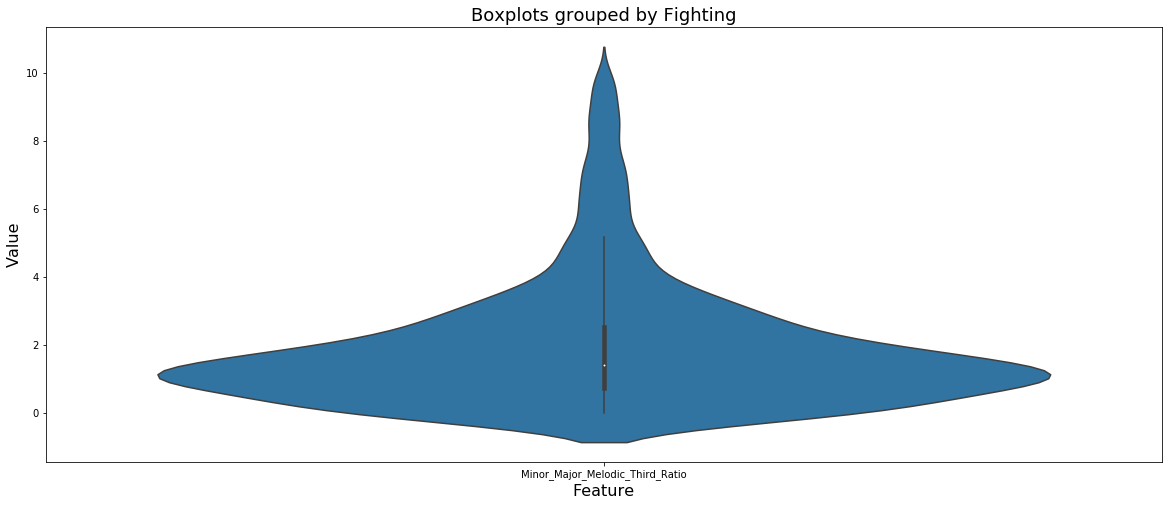

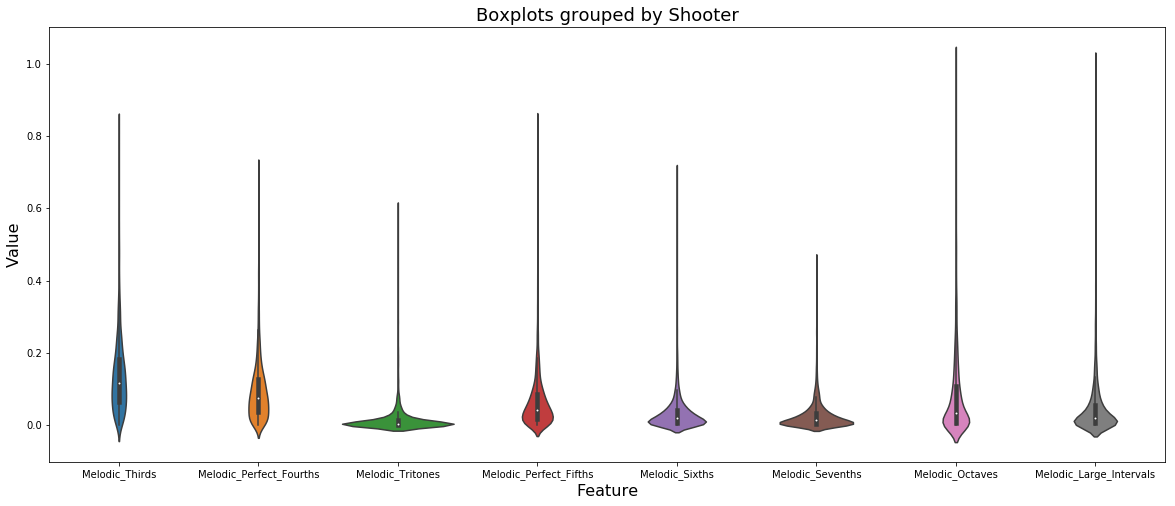

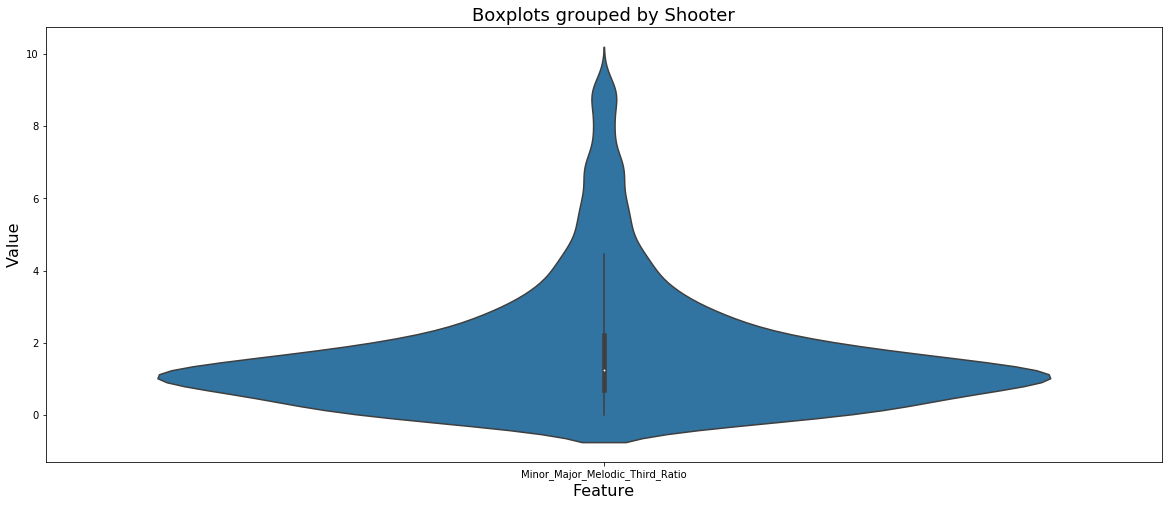

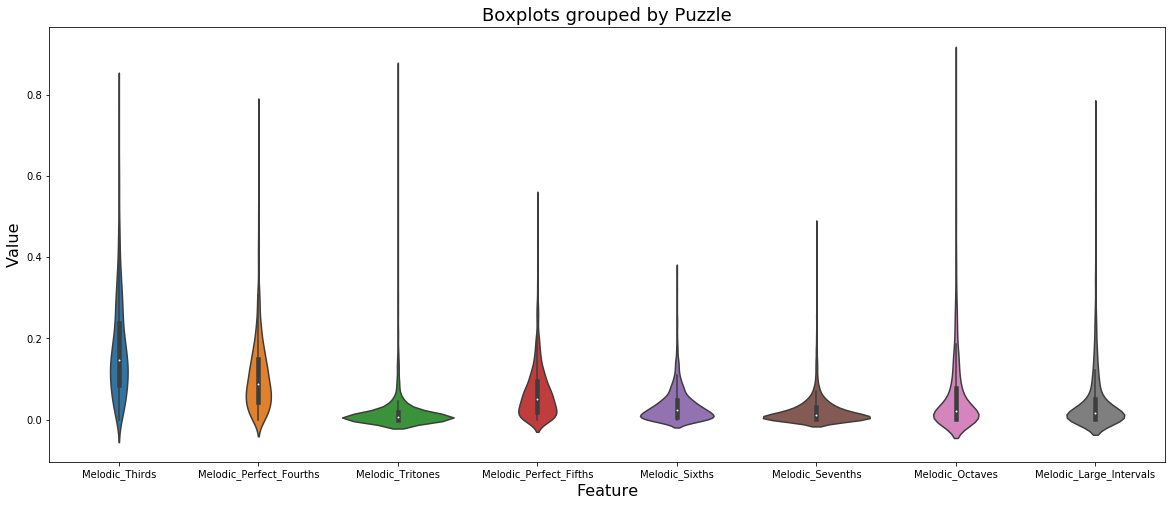

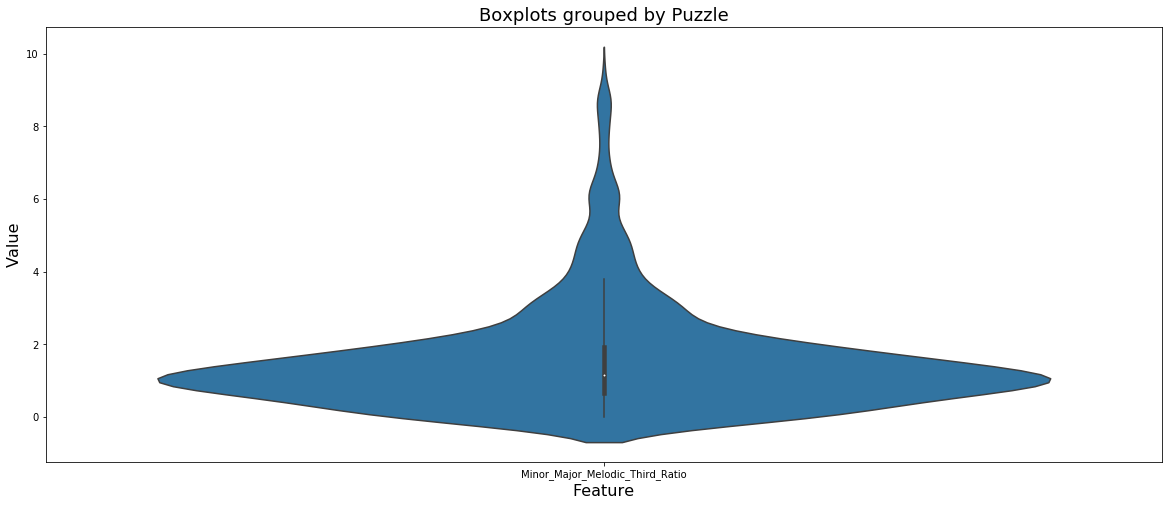

In [16]:
mel_intervals = ['Melodic_Thirds','Melodic_Perfect_Fourths',\
                'Melodic_Tritones','Melodic_Perfect_Fifths',\
                'Melodic_Sixths','Melodic_Sevenths','Melodic_Octaves', 'Melodic_Large_Intervals']
maj_min = ['Minor_Major_Melodic_Third_Ratio']
boxPlotByGenre('Action',mel_intervals, df_pred)
boxPlotByGenre('Adventure',mel_intervals, df_pred)
boxPlotByGenre('Role-Playing',mel_intervals, df_pred)
boxPlotByGenre('Fighting',mel_intervals, df_pred)
boxPlotByGenre('Shooter',mel_intervals, df_pred)
boxPlotByGenre('Puzzle',mel_intervals, df_pred)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


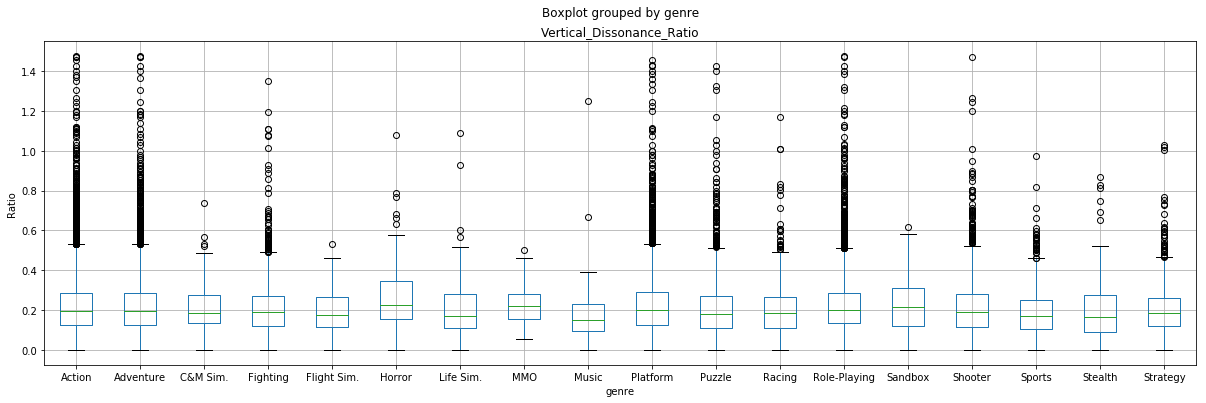

In [17]:
#Measure of dissonance
fig, ax = plt.subplots(figsize=(20,6))
plt.suptitle('')
df_diss_filter.boxplot(column='Vertical_Dissonance_Ratio', by='genre', ax=ax)
ax.set_ylabel('Ratio')
plt.show()

In [18]:
df_keys = pd.read_csv('keys.csv', index_col='file_name')

df_keys

,Unnamed: 0,tonic,mode,corr
file_name,,,,
0004cc74bde3bc82f44afb5f566187c3dbcea9b2.mid,0,D,major,0.707108
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,1,C,major,0.820627
00068e4ce263089f1c60d7eda59b3911bac44fea.mid,2,A,minor,0.793582
0008501bdcc7c8ddc9c228819986f7439cb9a8f5.mid,3,C,minor,0.637664
00097280d2d825f163aecfa7ccf69504db467d1d.mid,4,F,major,0.766140
000b1786fba7f8c9e3d8c26a29e893e87e82e463.mid,5,F,minor,0.291485
000d977eb0547ee6bbf96a1850766a3d6676aa03.mid,6,G,minor,0.623223
000e6a7f5511e138666751cc8a5f9421777305f1.mid,7,F,major,0.818666
00163c4e62c8b04105ef25271ddaa2a00c3b7874.mid,8,C,major,0.816771
